In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
import tensorflow as tf
from tensorflow import keras
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("GPU Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

GPU Available:  1


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [ ]:
model = Sequential([
    Dense(4, input_shape=(1,), activation='relu'),
    Dense(3, activation='relu'),
    Dense(2, activation='softmax')
])

In [ ]:
model.summary()

In [ ]:
model2 = Sequential()

model2.add(Dense(4, input_shape=(1,), activation='relu'))
model2.add(Dense(3, activation='relu'))
model2.add(Dense(2, activation='softmax'))

In [ ]:
model2.summary()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model3 = keras.Sequential(
    layers=[
        layers.Dense(256, input_dim=4, activation="relu", name="input"),
        layers.Dense(128, activation="relu", name="layer1"),
        layers.Dense(64, activation="relu", name="layer2"),
        layers.Dense(2, activation="softmax", name="output")
    ],
    name="sequential_model1"
)

In [ ]:
model3.summary()

In [ ]:
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [ ]:
model.compile(
    Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.optimizer.learning_rate

In [ ]:
model.optimizer.learning_rate=0.01

In [ ]:
model.optimizer.learning_rate

In [ ]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [ ]:
training_set = []
training_labels = []

for i in range(125):
  random_under50 = randint(10, 50)
  training_set.append(random_under50)
  training_labels.append(1)

  random_over50 = randint(51, 90)
  training_set.append(random_over50)
  training_labels.append(0)

for i in range(2500):
  random_under50 = randint(10, 50)
  training_set.append(random_under50)
  training_labels.append(0)

  random_over50 = randint(51, 90)
  training_set.append(random_over50)
  training_labels.append(1)

In [ ]:
training_labels = np.array(training_labels)
training_set = np.array(training_set)
training_labels,training_set = shuffle(training_labels,training_set)

In [ ]:
print(training_set)
print(training_labels)

[17 77 15 ... 86 32 34]
[0 1 0 ... 1 0 0]


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_training_set = scaler.fit_transform(training_set.reshape(-1,1))

In [ ]:
scaled_training_set

array([[0.0875],
       [0.8375],
       [0.0625],
       ...,
       [0.95  ],
       [0.275 ],
       [0.3   ]])

In [ ]:
model = Sequential([
    Dense(units=12, input_shape=(1,),activation='relu'),
    Dense(units=24, activation='relu'),
    Dense(units=12, activation='relu'),
    Dense(units=12, activation='softmax')
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=scaled_training_set, y=training_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
473/473 - 5s - loss: 0.8561 - accuracy: 0.7509 - val_loss: 0.3460 - val_accuracy: 0.9219 - 5s/epoch - 12ms/step
Epoch 2/30
473/473 - 1s - loss: 0.2939 - accuracy: 0.9299 - val_loss: 0.2801 - val_accuracy: 0.8933 - 1s/epoch - 2ms/step
Epoch 3/30
473/473 - 1s - loss: 0.2626 - accuracy: 0.9350 - val_loss: 0.2460 - val_accuracy: 0.9581 - 1s/epoch - 2ms/step
Epoch 4/30
473/473 - 1s - loss: 0.2532 - accuracy: 0.9416 - val_loss: 0.2374 - val_accuracy: 0.9581 - 1s/epoch - 2ms/step
Epoch 5/30
473/473 - 2s - loss: 0.2470 - accuracy: 0.9412 - val_loss: 0.2328 - val_accuracy: 0.9581 - 2s/epoch - 4ms/step
Epoch 6/30
473/473 - 2s - loss: 0.2419 - accuracy: 0.9418 - val_loss: 0.2276 - val_accuracy: 0.9448 - 2s/epoch - 4ms/step
Epoch 7/30
473/473 - 2s - loss: 0.2402 - accuracy: 0.9401 - val_loss: 0.2233 - val_accuracy: 0.9448 - 2s/epoch - 4ms/step
Epoch 8/30
473/473 - 1s - loss: 0.2347 - accuracy: 0.9405 - val_loss: 0.2199 - val_accuracy: 0.9581 - 1s/epoch - 2ms/step
Epoch 9/30
473/473 - 2s

In [ ]:
test_set = []
test_labels = []

for i in range(25):
  random_under50 = randint(10, 50)
  test_set.append(random_under50)
  test_labels.append(1)

  random_over50 = randint(51, 90)
  test_set.append(random_over50)
  test_labels.append(0)

for i in range(500):
  random_under50 = randint(10, 50)
  test_set.append(random_under50)
  test_labels.append(0)

  random_over50 = randint(51, 90)
  test_set.append(random_over50)
  test_labels.append(1)

In [ ]:
test_labels = np.array(test_labels)
test_set = np.array(test_set)
test_labels,training_set = shuffle(test_labels,test_set)
scaled_test_set=scaler.fit_transform(test_set.reshape(-1,1))

In [ ]:
scaled_test_set

array([[0.3625],
       [0.8875],
       [0.425 ],
       ...,
       [0.7875],
       [0.125 ],
       [0.7625]])

In [ ]:
predictions = model.predict(x=scaled_test_set, batch_size=10, verbose=10)

In [ ]:
predictions

array([[9.49037731e-01, 5.09616584e-02, 6.69059972e-08, ...,
        2.92430613e-08, 2.26073329e-08, 3.86396657e-08],
       [4.29122038e-02, 9.57085788e-01, 1.51021894e-07, ...,
        1.31096670e-07, 1.38617878e-07, 1.17543316e-07],
       [9.49513912e-01, 5.04844934e-02, 2.19516338e-07, ...,
        1.10417545e-07, 7.85691299e-08, 1.20546176e-07],
       ...,
       [4.51506861e-02, 9.54845607e-01, 3.08135725e-07, ...,
        1.98987991e-07, 2.42750957e-07, 2.18499281e-07],
       [9.31962371e-01, 6.80376366e-02, 2.79731305e-09, ...,
        7.49453777e-10, 8.25399804e-10, 1.79175608e-09],
       [4.57274392e-02, 9.54268098e-01, 3.68263898e-07, ...,
        2.20865317e-07, 2.79246535e-07, 2.55126423e-07]], dtype=float32)

In [ ]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [ ]:
rounded_predictions

array([0, 1, 0, ..., 1, 0, 1])

Visualization


In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt


In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion Matrix without Normalization")

  print(cm)

  thresh = cm.max() / 2.0

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i,j], horizontalalignment="center", color="white" if cm[i,j] > thresh else "black")

  plt.tight_layout()
  plt.xlabel('Predicted label')
  plt.ylabel('True label')

Confusion Matrix without Normalization
[[253 272]
 [259 266]]


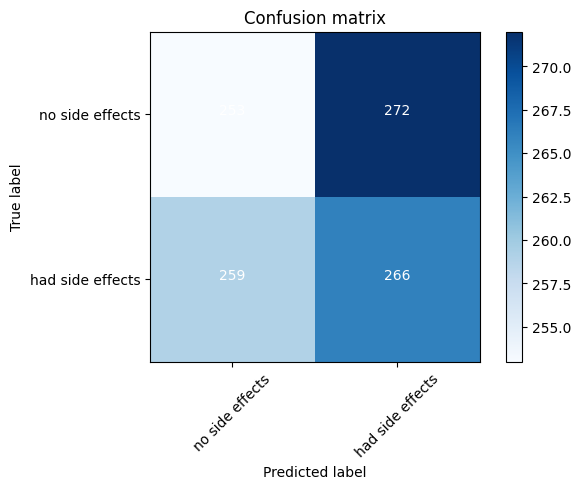

In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

cm_plot_labels = ['no side effects','had side effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels)

In [ ]:
import os.path
if os.path.isfile('vaccine_trial_model.h5') is False:
  model.save('vaccine_trial_model.h5')
  print("Model Saved!")

Model Saved!


In [ ]:

from tensorflow.keras.models import load_model
new_model = load_model('vaccine_trial_model.h5')

In [ ]:

new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                24        
                                                                 
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dense_2 (Dense)             (None, 12)                300       
                                                                 
 dense_3 (Dense)             (None, 12)                156       
                                                                 
Total params: 792
Trainable params: 792
Non-trainable params: 0
_________________________________________________________________


In [ ]:
new_model.get_weights()

[array([[-0.42530346,  0.86853653, -0.21343964,  0.08553171, -0.35744855,
          1.0795697 ,  0.89339983,  0.74679995, -0.09802461, -0.10146105,
         -0.11100391,  0.08156449]], dtype=float32),
 array([ 0.        , -0.3992369 ,  0.        ,  0.36631083,  0.        ,
        -0.1159493 , -0.20265913, -0.09590019,  0.        ,  0.        ,
         0.39893895, -0.01999488], dtype=float32),
 array([[ 1.66251898e-01, -4.02625233e-01,  3.72334421e-01,
          3.32037628e-01, -3.05745602e-02,  2.52093136e-01,
          3.49630415e-02, -3.56248796e-01, -1.88546240e-01,
          2.35759914e-01,  2.34127820e-01,  3.13892365e-02,
         -5.41577041e-02, -6.58321381e-02, -9.73344743e-02,
          9.94085670e-02, -3.89046639e-01,  3.62254798e-01,
          1.09032691e-02,  3.40574384e-02,  3.80271971e-01,
          3.28239083e-01,  3.67768586e-01, -3.78873110e-01],
        [ 5.42832613e-02, -6.87003851e-01, -2.11134949e-03,
          8.44827771e-01,  3.41501869e-02, -8.50201964e-01,
 

In [ ]:
json_string = model.to_json()

In [ ]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 1], "units": 12, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 24, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [ ]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [ ]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                24        
                                                                 
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dense_2 (Dense)             (None, 12)                300       
                                                                 
 dense_3 (Dense)             (None, 12)                156       
                                                                 
Total params: 792
Trainable params: 792
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import os.path
if os.path.isfile('model_weights.h5') is False:
  model.save_weights('model_weights.h5')
  print("Model Saved!")

Model Saved!


In [ ]:
model2 = Sequential([
      Dense(units=12, input_shape=(1,), activation='relu'),
      Dense(units=24, activation='relu'),
      Dense(units=12, activation='relu'),
      Dense(units=2, activation='softmax')
])

In [ ]:
model2.get_weights()

[array([[-0.20121098, -0.24159193, -0.59137106, -0.11268371, -0.2776957 ,
          0.34714544, -0.21571133,  0.61846983,  0.32828104,  0.12049276,
         -0.6601693 ,  0.49499154]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.31014645, -0.06244463, -0.0513536 , -0.10652396,  0.3208086 ,
         -0.22974509, -0.3282534 , -0.13060048, -0.39285094, -0.24191183,
         -0.24773006,  0.06263909, -0.20102815, -0.19085772, -0.16292433,
          0.3673504 , -0.16304192,  0.24982333,  0.16319901,  0.37901902,
         -0.02123749,  0.26782173, -0.29068142, -0.09738645],
        [ 0.3433934 , -0.30132195,  0.23294038, -0.26193053, -0.01512092,
         -0.01939729, -0.26365867, -0.3248133 ,  0.39201516,  0.39897615,
         -0.03070107, -0.23610294,  0.06182227, -0.18433839,  0.32996327,
         -0.20037192, -0.40169325,  0.14554965, -0.36736608,  0.09009194,
          0.0012629 , -0.30291474, -0.04125968, -0.18169996],
        [-

REGULARIZERS

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
model = Sequential([
      Dense(units=12, input_shape=(1,), activation='relu'),
      Dense(units=24, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
      Dense(units=12, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
      Dense(units=2, activation='softmax')
])

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers

layer = layers.Dense(
    units = 64,
    kernel_regularizer=regularizers.l1_l2(l1=1e-5,l2=1e-4),
    bias_regularizer=regularizers.l2(1e-4),
    activity_regularizer=regularizers.l2(1e-5)

)

In [ ]:
from tensorflow.keras import regularizers


In [ ]:
model = Sequential([
      Dense(units=12, input_shape=(1,), activation='relu'),
      Dense(units=24, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
      Dense(units=12, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
      Dense(units=2, activation='softmax')
])

In [ ]:
model.summary()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

In [ ]:

initializer = tf.keras.initializers.GlorotNormal(1)

model = Sequential([
      Dense(units=2, input_shape=(1,), activation='relu'),
      Dense(units=24, activation='relu', kernel_initializer='glorot_uniform'),
      Dense(units=12, activation='relu', kernel_initializer=initializer),
      Dense(units=2, activation='softmax')
])


In [ ]:
model.summary()

In [ ]:
model.get_weights()

Batch Normalization


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization

In [ ]:

model = Sequential([
      Dense(units=2, input_shape=(1,), activation='relu'),
      Dense(units=24, activation='relu', kernel_initializer='glorot_uniform'),
      BatchNormalization(),
      Dense(units=12, activation='relu', kernel_initializer='glorot_uniform'),
      BatchNormalization(),
      Dense(units=2, activation='softmax')
])


In [ ]:
model.summary()

In [ ]:
model2 = Sequential([
      Dense(units=2, input_shape=(1,), activation='relu'),
      Dense(units=24, activation='relu', kernel_initializer='glorot_uniform'),
      Dense(units=12, activation='relu', kernel_initializer='glorot_uniform'),
      Dense(units=2, activation='softmax')
])

In [ ]:
model2.summary()

transfer learnign


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix


In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num Gpu Available :", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
import tensorflow_datasets as tfds

tfds.disable_progress_bar()

train_ds, validation_ds, test_ds = tfds.load(
    "cats_vs_dogs",
    # Reserve 10% for validation and 10% for test
    split=["train[:40%]", "train[40%:50%]", "train[50%:60%]"],
    as_supervised=True,  # Include labels
)

print("Number of training samples: %d" % tf.data.experimental.cardinality(train_ds))
print(
    "Number of validation samples: %d" % tf.data.experimental.cardinality(validation_ds)
)
print("Number of test samples: %d" % tf.data.experimental.cardinality(test_ds))


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_ds.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(int(label))
    plt.axis("off")

In [ ]:
size = (150, 150)
train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, size), y))
validation_ds = validation_ds.map(lambda x, y: (tf.image.resize(x, size), y))
test_ds = test_ds.map(lambda x, y: (tf.image.resize(x, size), y))

In [ ]:
batch_size = 32

train_ds = train_ds.cache().batch(batch_size).prefetch(buffer_size=10)
validation_ds = validation_ds.cache().batch(batch_size).prefetch(buffer_size=10)
test_ds = test_ds.cache().batch(batch_size).prefetch(buffer_size=10)

In [ ]:
from tensorflow.keras import layers

data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

In [ ]:
import numpy as np

for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(
            tf.expand_dims(first_image, 0), training=True
        )
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.title(int(labels[i]))
        plt.axis("off")


In [ ]:
base_model = keras.applications.Xception(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False,
)  # Do not include the ImageNet classifier at the top.

# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)  # Apply random data augmentation

# Pre-trained Xception weights requires that input be normalized
# from (0, 255) to a range (-1., +1.), the normalization layer
# does the following, outputs = (inputs - mean) / sqrt(var)
norm_layer = keras.layers.experimental.preprocessing.Normalization()
mean = np.array([127.5] * 3)
var = mean ** 2
# Scale inputs to [-1, +1]
x = norm_layer(x)
norm_layer.set_weights([mean, var])

# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.summary()

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

epochs = 3
model.fit(train_ds, epochs=epochs, validation_data=validation_ds)

In [ ]:
# Unfreeze the base_model. Note that it keeps running in inference mode
# since we passed `training=False` when calling it. This means that
# the batchnorm layers will not update their batch statistics.
# This prevents the batchnorm layers from undoing all the training
# we've done so far.
base_model.trainable = True
model.summary()

model.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

epochs = 2
model.fit(train_ds, epochs=epochs, validation_data=validation_ds)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

Max pooling 2D


In [ ]:

model = Sequential([
      Conv2D(32, (5,5), activation='relu', padding='same', input_shape=(28, 28, 1)),
      MaxPooling2D(pool_size=(2,2), padding='same'),
      Conv2D(32, (5,5), padding='same', activation='relu'),
      MaxPooling2D(pool_size=(2,2), padding='same'),
      Flatten(),
      Dense(1024, activation='relu'),
      Dropout(0.4),
      Dense(10)
])

In [ ]:
model.summary()

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("GPU Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

GPU Available:  1


IMPORT MNIST

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(y_train[:5])

img_rows = x_train[0].shape[0]
img_col = x_test[0].shape[1]

x_train = x_train.reshape(x_train.shape[0], img_rows, img_col, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_col, 1)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)
[5 0 4 1 9]


In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

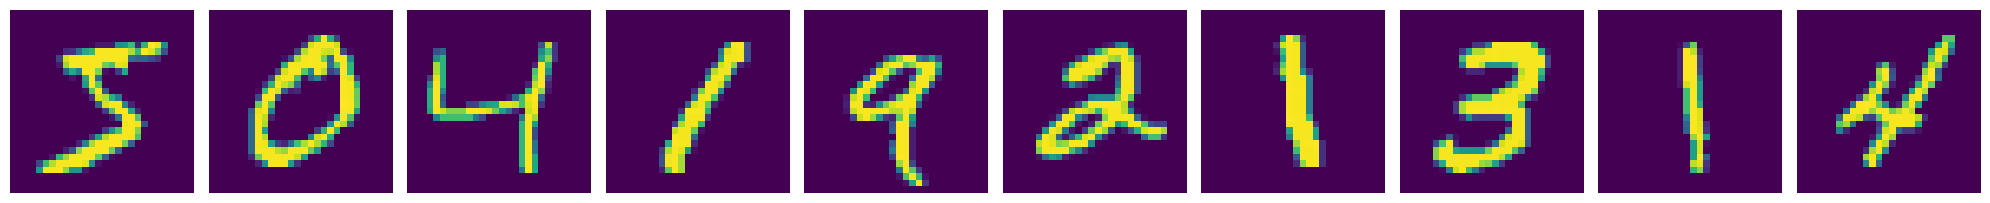

In [ ]:
plotImages(x_train[:10])

CREATE A CNN

In [ ]:
model = Sequential([
      Conv2D(32, (5,5), activation='relu', padding='same', input_shape=(28, 28, 1)),
      MaxPooling2D(pool_size=(2,2), padding='same'),
      Conv2D(32, (5,5), padding='same', activation='relu'),
      MaxPooling2D(pool_size=(2,2), padding='same'),
      Flatten(),
      Dense(1024, activation='relu'),
      Dropout(0.4),
      Dense(10)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 1024)              1

COMPILE THE NEURAL NETWORK


In [ ]:
model.compile(optimizer=Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy']
              )

BUILT IN CALL BACK FUN

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("/content/gdrive/MyDrive/ColabNotebooks/best_model.h5", monitor = 'val_loss', verbose = 1)

earlyStopping = EarlyStopping(
    monitor ="val_loss",
    patience = 5,
    restore_best_weights = True
)
reduceLR = ReduceLROnPlateau(monitor ='val_loss', factor=0.2, patience=3, min_lr=0.00001)

CREATE YOUR OWN CALL BACK FUN

TRAIN THE NEURAL NETWORK

In [ ]:
batch_size = 200
epochs = 10
steps_per_epoch = 54000 // batch_size
validation_steps = 6000 // batch_size

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    steps_per_epoch=steps_per_epoch,
                    validation_split=0.1,
                    validation_steps=validation_steps,
                    callbacks =[checkpoint, earlyStopping, reduceLR]
                    )

Epoch 1/10
265/270 [============================>.] - ETA: 0s - loss: 0.9492 - sparse_categorical_accuracy: 0.9080
Epoch 1: saving model to /content/gdrive/MyDrive/  ColabNotebooks/best_model.h5
270/270 [==============================] - 13s 7ms/step - loss: 0.9333 - sparse_categorical_accuracy: 0.9092 - val_loss: 0.0634 - val_sparse_categorical_accuracy: 0.9802 - lr: 0.0010
Epoch 2/10
268/270 [============================>.] - ETA: 0s - loss: 0.0645 - sparse_categorical_accuracy: 0.9794
Epoch 2: saving model to /content/gdrive/MyDrive/  ColabNotebooks/best_model.h5
270/270 [==============================] - 2s 7ms/step - loss: 0.0643 - sparse_categorical_accuracy: 0.9794 - val_loss: 0.0503 - val_sparse_categorical_accuracy: 0.9860 - lr: 0.0010
Epoch 3/10
269/270 [============================>.] - ETA: 0s - loss: 0.0443 - sparse_categorical_accuracy: 0.9862
Epoch 3: saving model to /content/gdrive/MyDrive/  ColabNotebooks/best_model.h5
270/270 [==============================] - 2s 7ms/

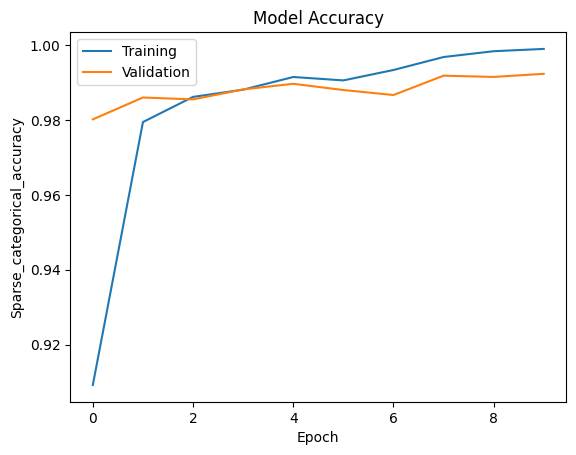

In [ ]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Sparse_categorical_accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

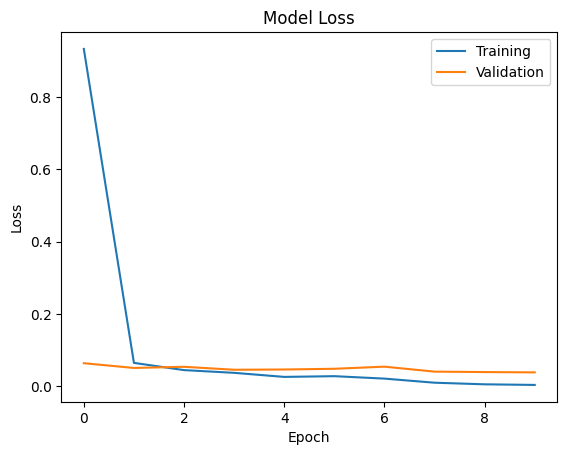

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 3ms/step - loss: 0.0361 - sparse_categorical_accuracy: 0.9910
[0.03612672910094261, 0.9909999966621399]


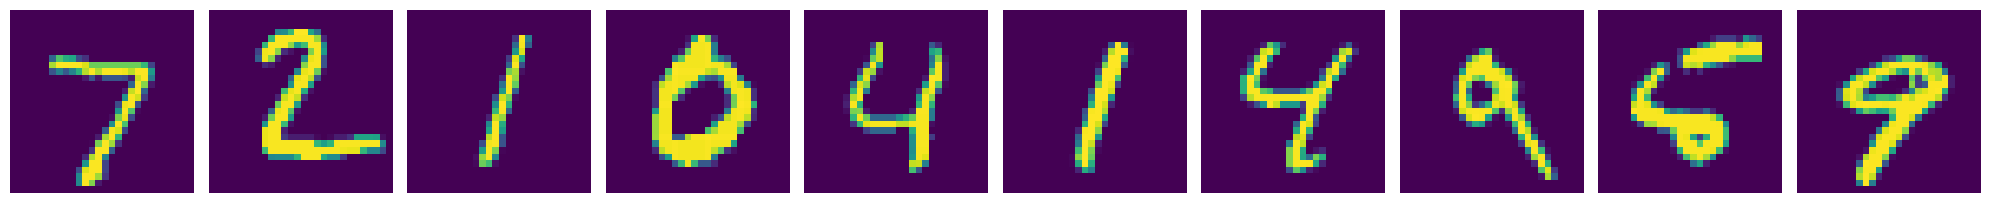

In [ ]:
plotImages(x_test[:10])

In [ ]:
predictions = np.argmax(model.predict(x_test[:12]), axis=-1)
print(predictions)

1/1 [==============================] - 0s 206ms/step
[7 2 1 0 4 1 4 9 5 9 0 6]


TPU


In [ ]:
import tensorflow as tf
import os
import numpy as np
import tensorflow_datasets as tfds

In [ ]:
assert 'COLAB_TPU_ADDR' in os.environ, 'Missing TPU; did you request a TPU in Notebook Settings?'

if 'COLAB_TPU_ADDR' in os.environ:
  TF_MASTER = 'grpc://{}'.format(os.environ['COLAB_TPU_ADDR'])
else:
  TF_MASTER=''

tpu_address = TF_MASTER

Initialize the TPU

In [ ]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu_address)
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))
print("Number of devices: ", len(tf.config.list_logical_devices('TPU')))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]
Number of devices:  8


Choose a distribution strategy for hardware accelerator




1.  Run the model on multiple TPUs in a data parallel way





In [ ]:
strategy = tf.distribute.TPUStrategy(resolver)

Create a CNN and train it on TPU's

In [ ]:
def create_model():
  return tf.keras.Sequential(
      [tf.keras.layers.Conv2D(256, (3,3), activation='relu', input_shape=(28, 28, 1)),
       tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(256, activation='relu'),
       tf.keras.layers.Dense(128, activation='relu'),
       tf.keras.layers.Dense(10)
       ])

In [ ]:
def create_model():
  return tf.keras.Sequential(
      [tf.keras.layers.Conv2D(32, (5,5), activation='relu', padding='same', input_shape=(28, 28, 1)),
       tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'),
       tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
       tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(1024, activation='relu'),
       tf.keras.layers.Dropout(0.4),
       tf.keras.layers.Dense(10)
       ])

Load the MNIST dtaset

In [ ]:
def get_dataset(batch_size, is_training=True):
  split = 'train' if is_training else 'test'
  dataset, info = tfds.load(name='mnist', split=split, with_info=True,
                            as_supervised=True, try_gcs=True)

  def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255.0

    return image, label

  dataset = dataset.map(scale)

  # Only shuffle and repeat the dataset in training. The advantage to have a
  # infinite dataset for training is to avoid the potential last partial batch
  # in each epoch, so users don't need to think about scaling the gradients
  # based on the actual batch size.
  if is_training:
    dataset = dataset.shuffle(10000)
    dataset = dataset.repeat()

  dataset = dataset.batch(batch_size)

  return dataset


COMPILE THE MODEL

In [ ]:
with strategy.scope():
  model = create_model()
  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['sparse_categorical_accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 1024)              1

Train the model on TPU's

In [ ]:
batch_size = 200

train_dataset = get_dataset(batch_size, is_training=True)
test_dataset = get_dataset(batch_size, is_training=False)

In [ ]:
epochs = 5
steps_per_epoch = 60000 // batch_size
validation_steps = 10000 // batch_size

history = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=test_dataset,
                    validation_steps=validation_steps)

Epoch 1/5
300/300 [==============================] - 20s 40ms/step - loss: 0.1946 - sparse_categorical_accuracy: 0.9390 - val_loss: 0.0449 - val_sparse_categorical_accuracy: 0.9868
Epoch 2/5
300/300 [==============================] - 6s 20ms/step - loss: 0.0530 - sparse_categorical_accuracy: 0.9835 - val_loss: 0.0311 - val_sparse_categorical_accuracy: 0.9894
Epoch 3/5
300/300 [==============================] - 6s 20ms/step - loss: 0.0363 - sparse_categorical_accuracy: 0.9887 - val_loss: 0.0253 - val_sparse_categorical_accuracy: 0.9911
Epoch 4/5
300/300 [==============================] - 8s 26ms/step - loss: 0.0278 - sparse_categorical_accuracy: 0.9910 - val_loss: 0.0254 - val_sparse_categorical_accuracy: 0.9912
Epoch 5/5
300/300 [==============================] - 6s 19ms/step - loss: 0.0219 - sparse_categorical_accuracy: 0.9927 - val_loss: 0.0202 - val_sparse_categorical_accuracy: 0.9934


In [ ]:
with strategy.scope():
  model = create_model()
  model.compile(optimizer='adam',
                # Anything between 2 and `steps_per_epoch` could help here.
                steps_per_execution = 50,
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['sparse_categorical_accuracy'])

epochs = 5
steps_per_epoch = 60000 // batch_size
validation_steps = 10000 // batch_size

history = model.fit(train_dataset,
                epochs=5,
                steps_per_epoch=steps_per_epoch,
                validation_data=test_dataset,
                validation_steps=validation_steps)

Epoch 1/5
300/300 [==============================] - 15s 50ms/step - loss: 0.1959 - sparse_categorical_accuracy: 0.9408 - val_loss: 0.0434 - val_sparse_categorical_accuracy: 0.9855
Epoch 2/5
300/300 [==============================] - 3s 9ms/step - loss: 0.0508 - sparse_categorical_accuracy: 0.9841 - val_loss: 0.0412 - val_sparse_categorical_accuracy: 0.9874
Epoch 3/5
300/300 [==============================] - 3s 9ms/step - loss: 0.0359 - sparse_categorical_accuracy: 0.9887 - val_loss: 0.0319 - val_sparse_categorical_accuracy: 0.9897
Epoch 4/5
300/300 [==============================] - 3s 9ms/step - loss: 0.0275 - sparse_categorical_accuracy: 0.9912 - val_loss: 0.0278 - val_sparse_categorical_accuracy: 0.9906
Epoch 5/5
300/300 [==============================] - 3s 10ms/step - loss: 0.0212 - sparse_categorical_accuracy: 0.9934 - val_loss: 0.0248 - val_sparse_categorical_accuracy: 0.9917


AUTO **KERAS**

In [ ]:
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.8/466.8 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 45.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils.data_utils import Sequence
import autokeras as ak

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

GPUs Available:  1


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)
print(y_train[:3])  # array([7, 2, 1], dtype=uint8)

11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)
(60000,)
[5 0 4]


In [ ]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
# Initialize the image classifier.
clf = ak.ImageClassifier(
    overwrite=True,
    max_trials=1)
# Feed the image classifier with training data.
history = clf.fit(x_train, y_train)

Trial 1 Complete [00h 03m 53s]
val_loss: 0.03726474195718765

Best val_loss So Far: 0.03726474195718765
Total elapsed time: 00h 03m 53s
Epoch 1/13
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1554 - accuracy: 0.9531
Epoch 2/13
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0742 - accuracy: 0.9772
Epoch 3/13
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0611 - accuracy: 0.9810
Epoch 4/13
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0515 - accuracy: 0.9839
Epoch 5/13
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0461 - accuracy: 0.9855
Epoch 6/13
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0425 - accuracy: 0.9861
Epoch 7/13
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0377 - accuracy: 0.9879
Epoch 8/13
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0358 - accuracy: 0.9887
Epoch 9/13
1875/1875 [=========================

In [ ]:
model = clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 28, 28)           0         
 t32)                                                            
                                                                 
 expand_last_dim (ExpandLast  (None, 28, 28, 1)        0         
 Dim)                                                            
                                                                 
 normalization (Normalizatio  (None, 28, 28, 1)        3         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                             

In [ ]:
import matplotlib.pyplot as plt

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

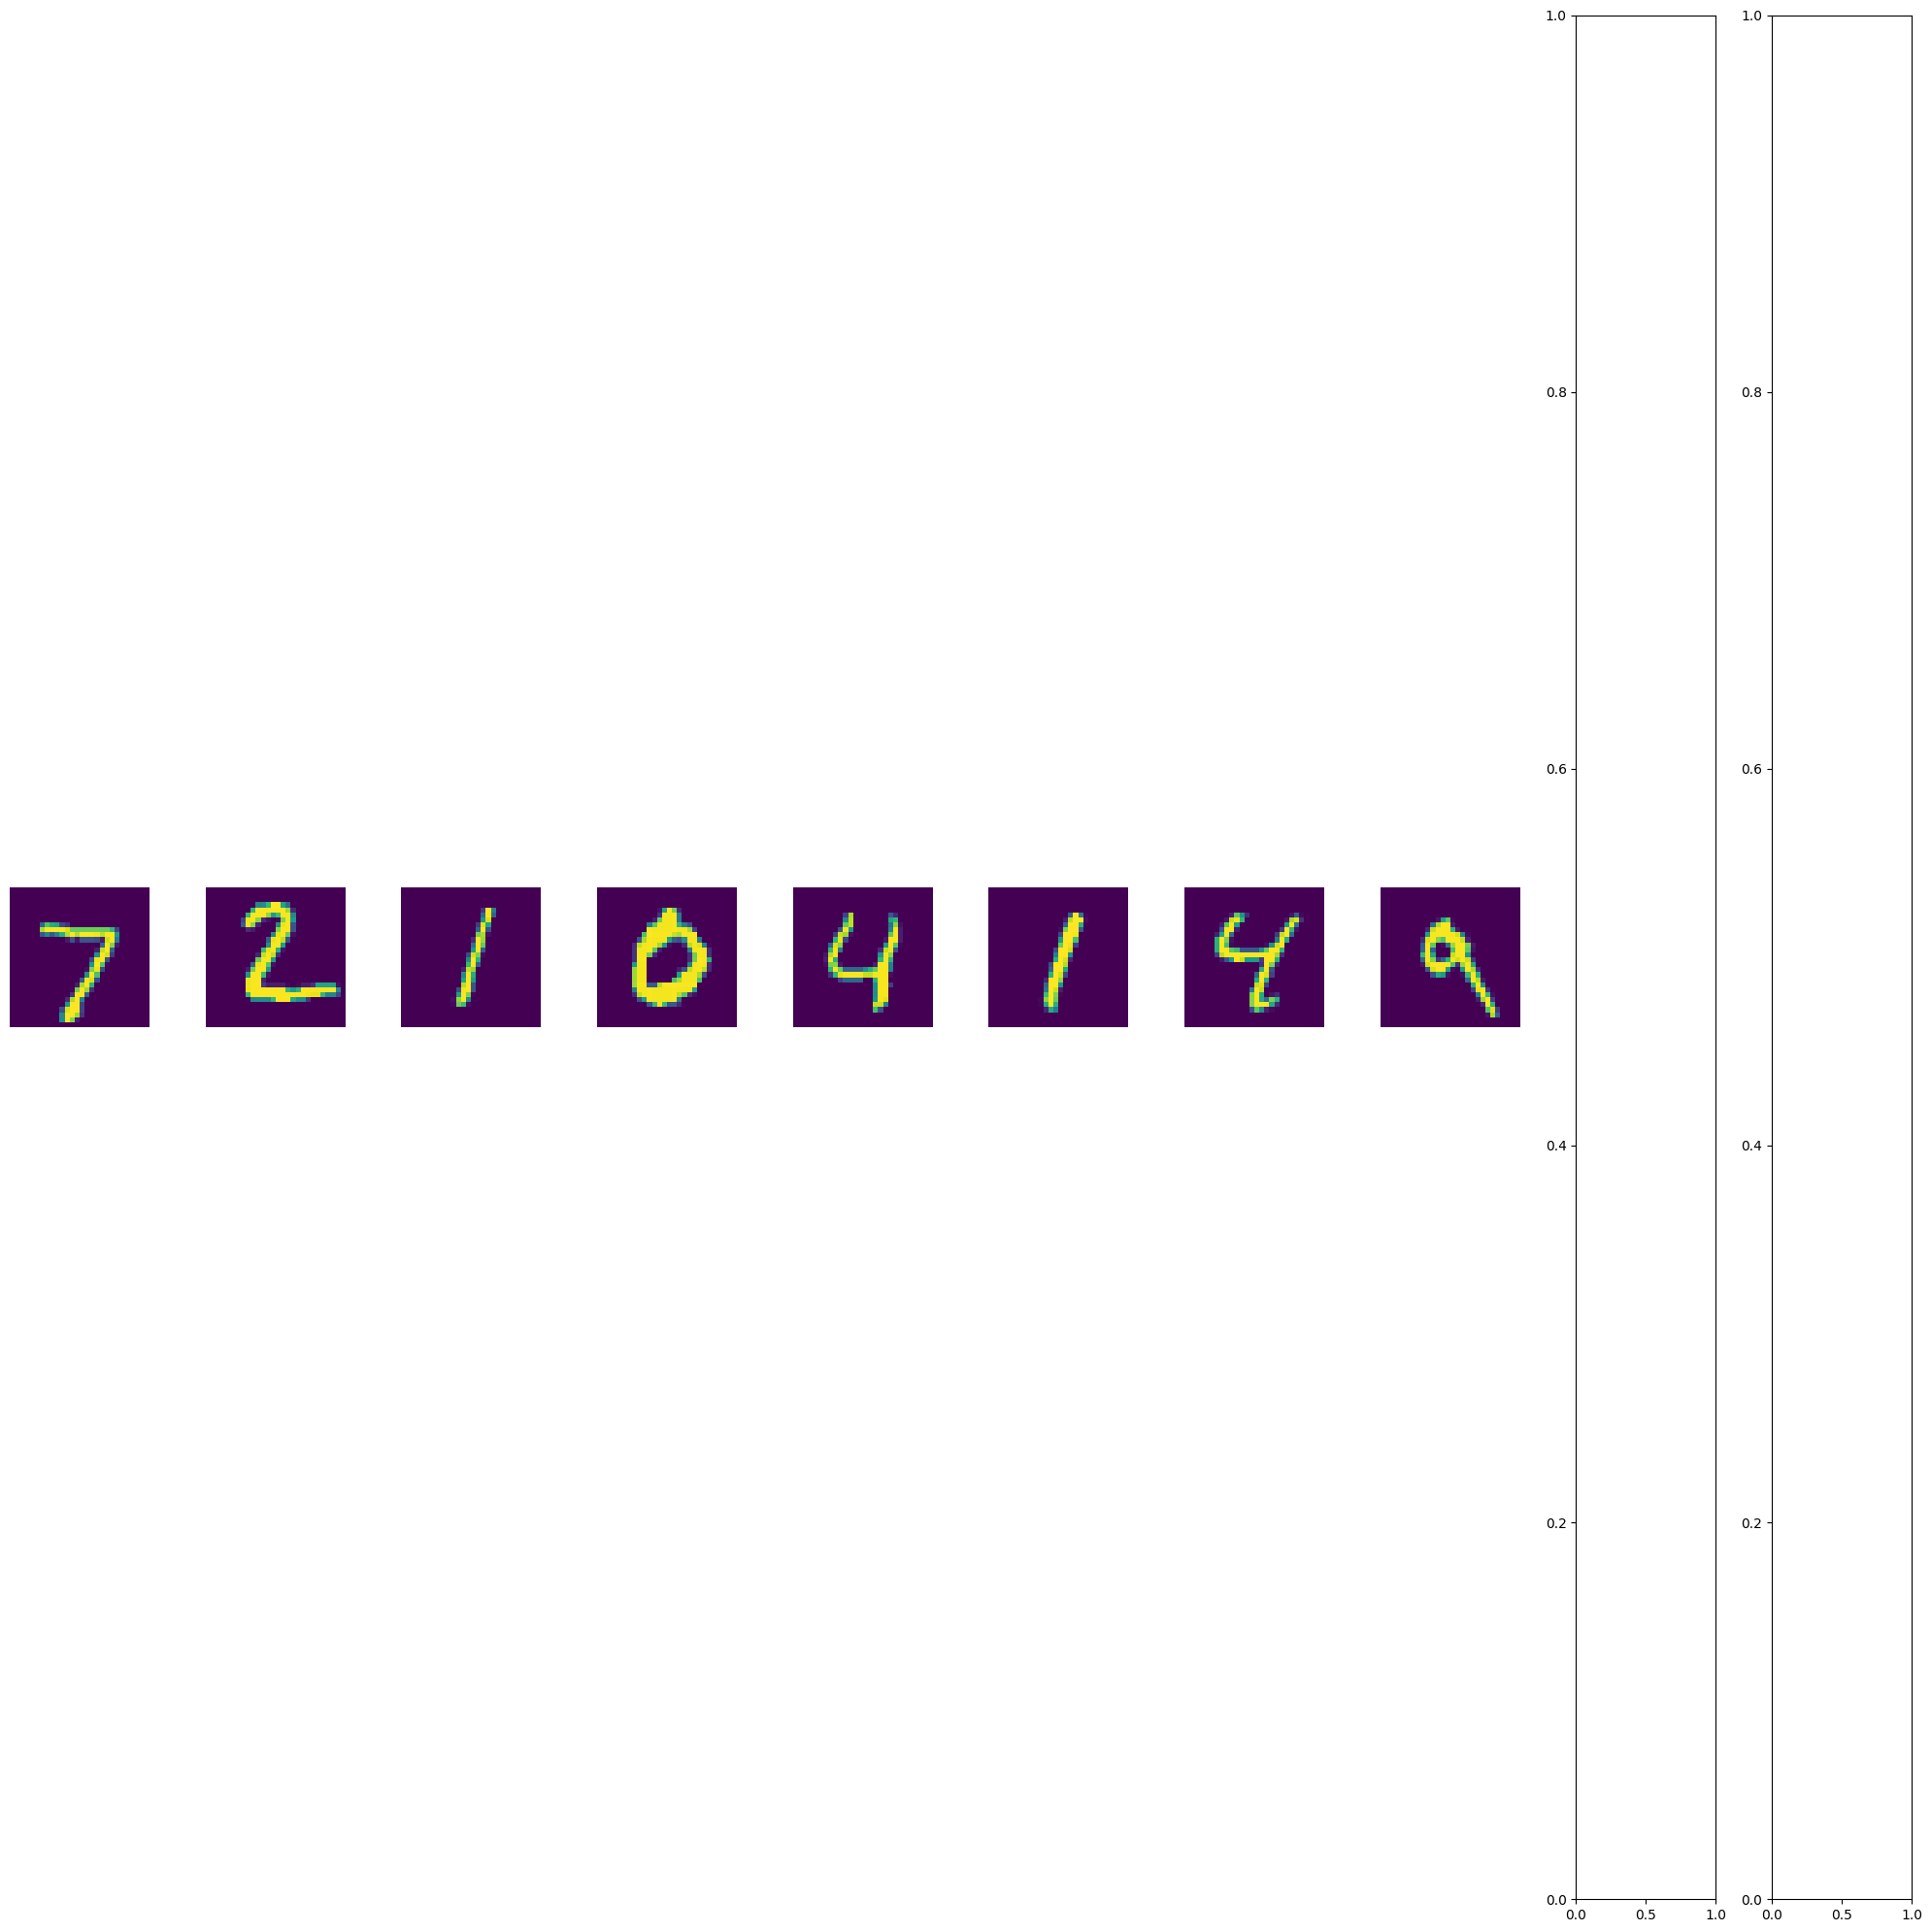

In [ ]:
plotImages(x_test[:8])

In [ ]:
# Predict with the best model.
predicted_y = clf.predict(x_test[:8])
print(predicted_y)

1/1 [==============================] - 0s 6ms/step
[['7']
 ['2']
 ['1']
 ['0']
 ['4']
 ['1']
 ['4']
 ['9']]


In [ ]:
# Evaluate the best model with testing data.
print(clf.evaluate(x_test, y_test))

313/313 [==============================] - 1s 4ms/step - loss: 0.0318 - accuracy: 0.9903
[0.031788650900125504, 0.9902999997138977]


POINT CLOUD CLASSIFICATION WITH POINT **NETWORKS**

In [ ]:
!pip install trimesh
import os
import glob
import trimesh
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

tf.random.set_seed(1234)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 680.8/680.8 kB 11.1 MB/s eta 0:00:00


In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

GPUs Available:  1


DOWNLOAD the dataset

In [ ]:
DATA_DIR = tf.keras.utils.get_file(
    "modelnet.zip",
    "http://3dvision.princeton.edu/projects/2014/3DShapeNets/ModelNet10.zip",
    extract=True,
)
DATA_DIR = os.path.join(os.path.dirname(DATA_DIR), "ModelNet10")

473402300/473402300 [==============================] - 7s 0us/step


VISUALIZE A MESH FROM DATASET

In [ ]:
mesh = trimesh.load(os.path.join(DATA_DIR, "chair/train/chair_0001.off"))
mesh.show()

SAMPLE A MESH AND SHOW THE RESULT

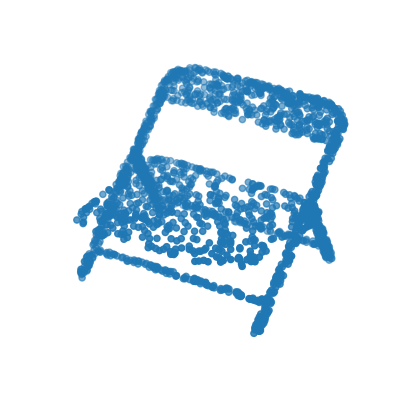

In [ ]:
points = mesh.sample(2048)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(points[:, 0], points[:, 1], points[:, 2])
ax.set_axis_off()
plt.show()

FUNCTION TO PARSE DATA

In [ ]:
def parse_dataset(num_points=2048):

  train_labels = []
  test_labels = []
  train_points = []
  test_points = []

  class_map = {}
  folders = glob.glob(os.path.join(DATA_DIR, "[!README]*"))

  for i, folder in enumerate(folders):
    print("processing class: {}".format(os.path.basename(folder)))
    # store folder name with ID so we can retrieve later
    class_map[i] = folder.split("/")[-1]
    # gather all files
    train_files = glob.glob(os.path.join(folder, "train/*"))
    test_files = glob.glob(os.path.join(folder, "test/*"))

  for f in train_files:
    train_points.append(trimesh.load(f).sample(num_points))
    train_labels.append(i)
  for f in test_files:
    test_points.append(trimesh.load(f).sample(num_points))
    test_labels.append(i)

  return(
      np.array(train_points),
      np.array(test_points),
      np.array(train_labels),
      np.array(test_labels),
      class_map,
  )

PARASETHE DATSET AND PROCESS EACH CLASS

In [ ]:
NUM_POINTS = 2048
NUM_CLASSES = 10
BATCH_SIZE = 32

train_points, test_points, train_labels, test_labels, CLASS_MAP = parse_dataset(NUM_POINTS)

processing class: bathtub
processing class: dresser
processing class: monitor
processing class: night_stand
processing class: chair
processing class: bed
processing class: table
processing class: desk
processing class: sofa
processing class: toilet


AUGUMENT THE DATASET

In [ ]:
def augment(points, label):
    # jitter points
    points += tf.random.uniform(points.shape, -0.005, 0.005, dtype=tf.float64)
    # shuffle points
    points = tf.random.shuffle(points)
    return points, label


train_dataset = tf.data.Dataset.from_tensor_slices((train_points, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_points, test_labels))

train_dataset = train_dataset.shuffle(len(train_points)).map(augment).batch(BATCH_SIZE)
test_dataset = test_dataset.shuffle(len(test_points)).batch(BATCH_SIZE)

FUNCTIONS TO BUILD THE DATASET

In [ ]:
def conv_bn(x, filters):
    x = layers.Conv1D(filters, kernel_size=1, padding="valid")(x)
    x = layers.BatchNormalization(momentum=0.0)(x)
    return layers.Activation("relu")(x)


def dense_bn(x, filters):
    x = layers.Dense(filters)(x)
    x = layers.BatchNormalization(momentum=0.0)(x)
    return layers.Activation("relu")(x)

In [ ]:
class OrthogonalRegularizer(keras.regularizers.Regularizer):
    def __init__(self, num_features, l2reg=0.001):
        self.num_features = num_features
        self.l2reg = l2reg
        self.eye = tf.eye(num_features)

    def __call__(self, x):
        x = tf.reshape(x, (-1, self.num_features, self.num_features))
        xxt = tf.tensordot(x, x, axes=(2, 2))
        xxt = tf.reshape(xxt, (-1, self.num_features, self.num_features))
        return tf.reduce_sum(self.l2reg * tf.square(xxt - self.eye))

**Function to create T-net Layers**

In [ ]:
def tnet(inputs, num_features):

    # Initalise bias as the indentity matrix
    bias = keras.initializers.Constant(np.eye(num_features).flatten())
    reg = OrthogonalRegularizer(num_features)

    x = conv_bn(inputs, 32)
    x = conv_bn(x, 64)
    x = conv_bn(x, 512)
    x = layers.GlobalMaxPooling1D()(x)
    x = dense_bn(x, 256)
    x = dense_bn(x, 128)
    x = layers.Dense(
        num_features * num_features,
        kernel_initializer="zeros",
        bias_initializer=bias,
        activity_regularizer=reg,
    )(x)
    feat_T = layers.Reshape((num_features, num_features))(x)
    # Apply affine transformation to input features
    return layers.Dot(axes=(2, 1))([inputs, feat_T])

In [ ]:
inputs = keras.Input(shape=(NUM_POINTS, 3))

x = tnet(inputs, 3)
x = conv_bn(x, 32)
x = conv_bn(x, 32)
x = tnet(x, 32)
x = conv_bn(x, 32)
x = conv_bn(x, 64)
x = conv_bn(x, 512)
x = layers.GlobalMaxPooling1D()(x)
x = dense_bn(x, 256)
x = layers.Dropout(0.3)(x)
x = dense_bn(x, 128)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="pointnet")
model.summary()

Model: "pointnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2048, 3)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 2048, 32)     128         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 2048, 32)    128         ['conv1d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 2048, 32)     0           ['batch_normalization[0][0

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["sparse_categorical_accuracy"],
)

model.fit(train_dataset, epochs=20, validation_data=test_dataset)

Epoch 1/20
11/11 [==============================] - 18s 225ms/step - loss: 1.0845 - sparse_categorical_accuracy: 1.0000 - val_loss: 27.8442 - val_sparse_categorical_accuracy: 1.0000
Epoch 2/20
11/11 [==============================] - 2s 162ms/step - loss: 1.0701 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.0264 - val_sparse_categorical_accuracy: 1.0000
Epoch 3/20
11/11 [==============================] - 2s 158ms/step - loss: 1.0553 - sparse_categorical_accuracy: 0.9971 - val_loss: 1.1138 - val_sparse_categorical_accuracy: 1.0000
Epoch 4/20
11/11 [==============================] - 2s 157ms/step - loss: 1.0459 - sparse_categorical_accuracy: 1.0000 - val_loss: 1.2508 - val_sparse_categorical_accuracy: 1.0000
Epoch 5/20
11/11 [==============================] - 2s 157ms/step - loss: 1.0472 - sparse_categorical_accuracy: 1.0000 - val_loss: 13403.7383 - val_sparse_categorical_accuracy: 1.0000
Epoch 6/20
11/11 [==============================] - 2s 157ms/step - loss: 1.0491 - sparse_cate

**Visualize The Predictions**

1/1 [==============================] - 1s 549ms/step


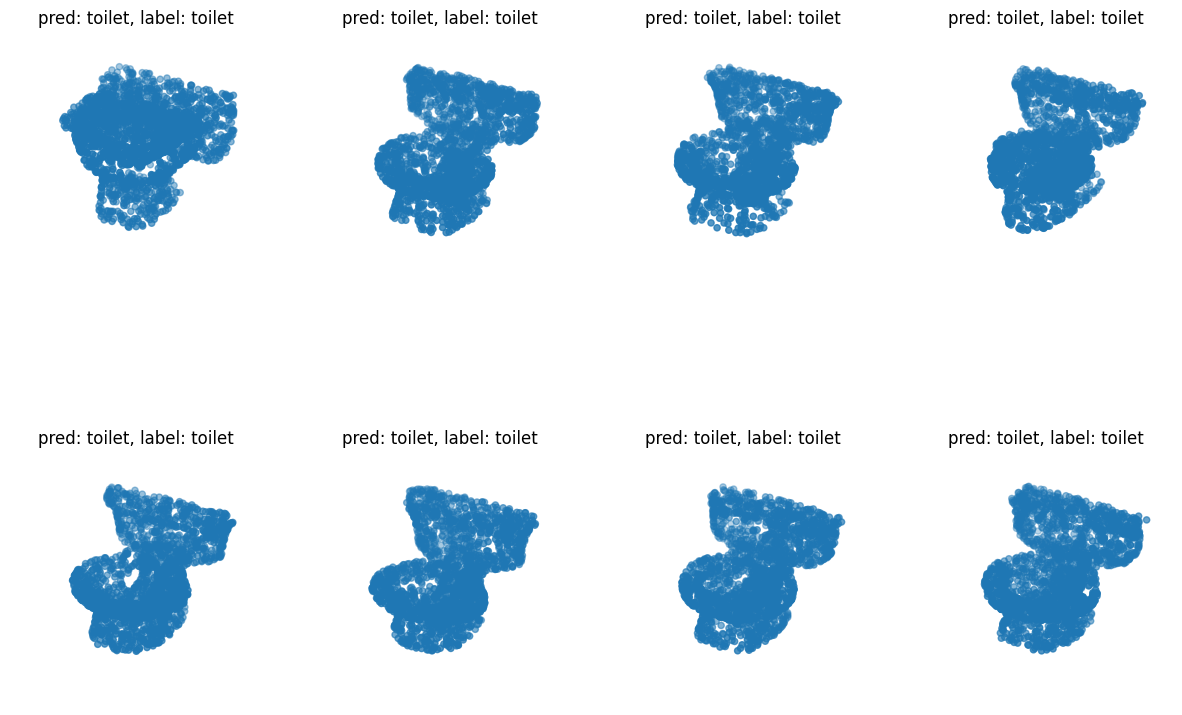

In [ ]:
data = test_dataset.take(1)

points, labels = list(data)[0]
points = points[:8, ...]
labels = labels[:8, ...]

# run test data through model
preds = model.predict(points)
preds = tf.math.argmax(preds, -1)

points = points.numpy()

# plot points with predicted class and label
fig = plt.figure(figsize=(15, 10))
for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, projection="3d")
    ax.scatter(points[i, :, 0], points[i, :, 1], points[i, :, 2])
    ax.set_title(
        "pred: {:}, label: {:}".format(
            CLASS_MAP[preds[i].numpy()], CLASS_MAP[labels.numpy()[i]]
        )
    )
    ax.set_axis_off()
plt.show()

**MOBILE NET**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
from IPython.display import Image

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
model = tf.keras.applications.MobileNet()

17225924/17225924 [==============================] - 2s 0us/step


In [ ]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
def prepare_image(file):
    img_path = '/content/gdrive/MyDrive/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

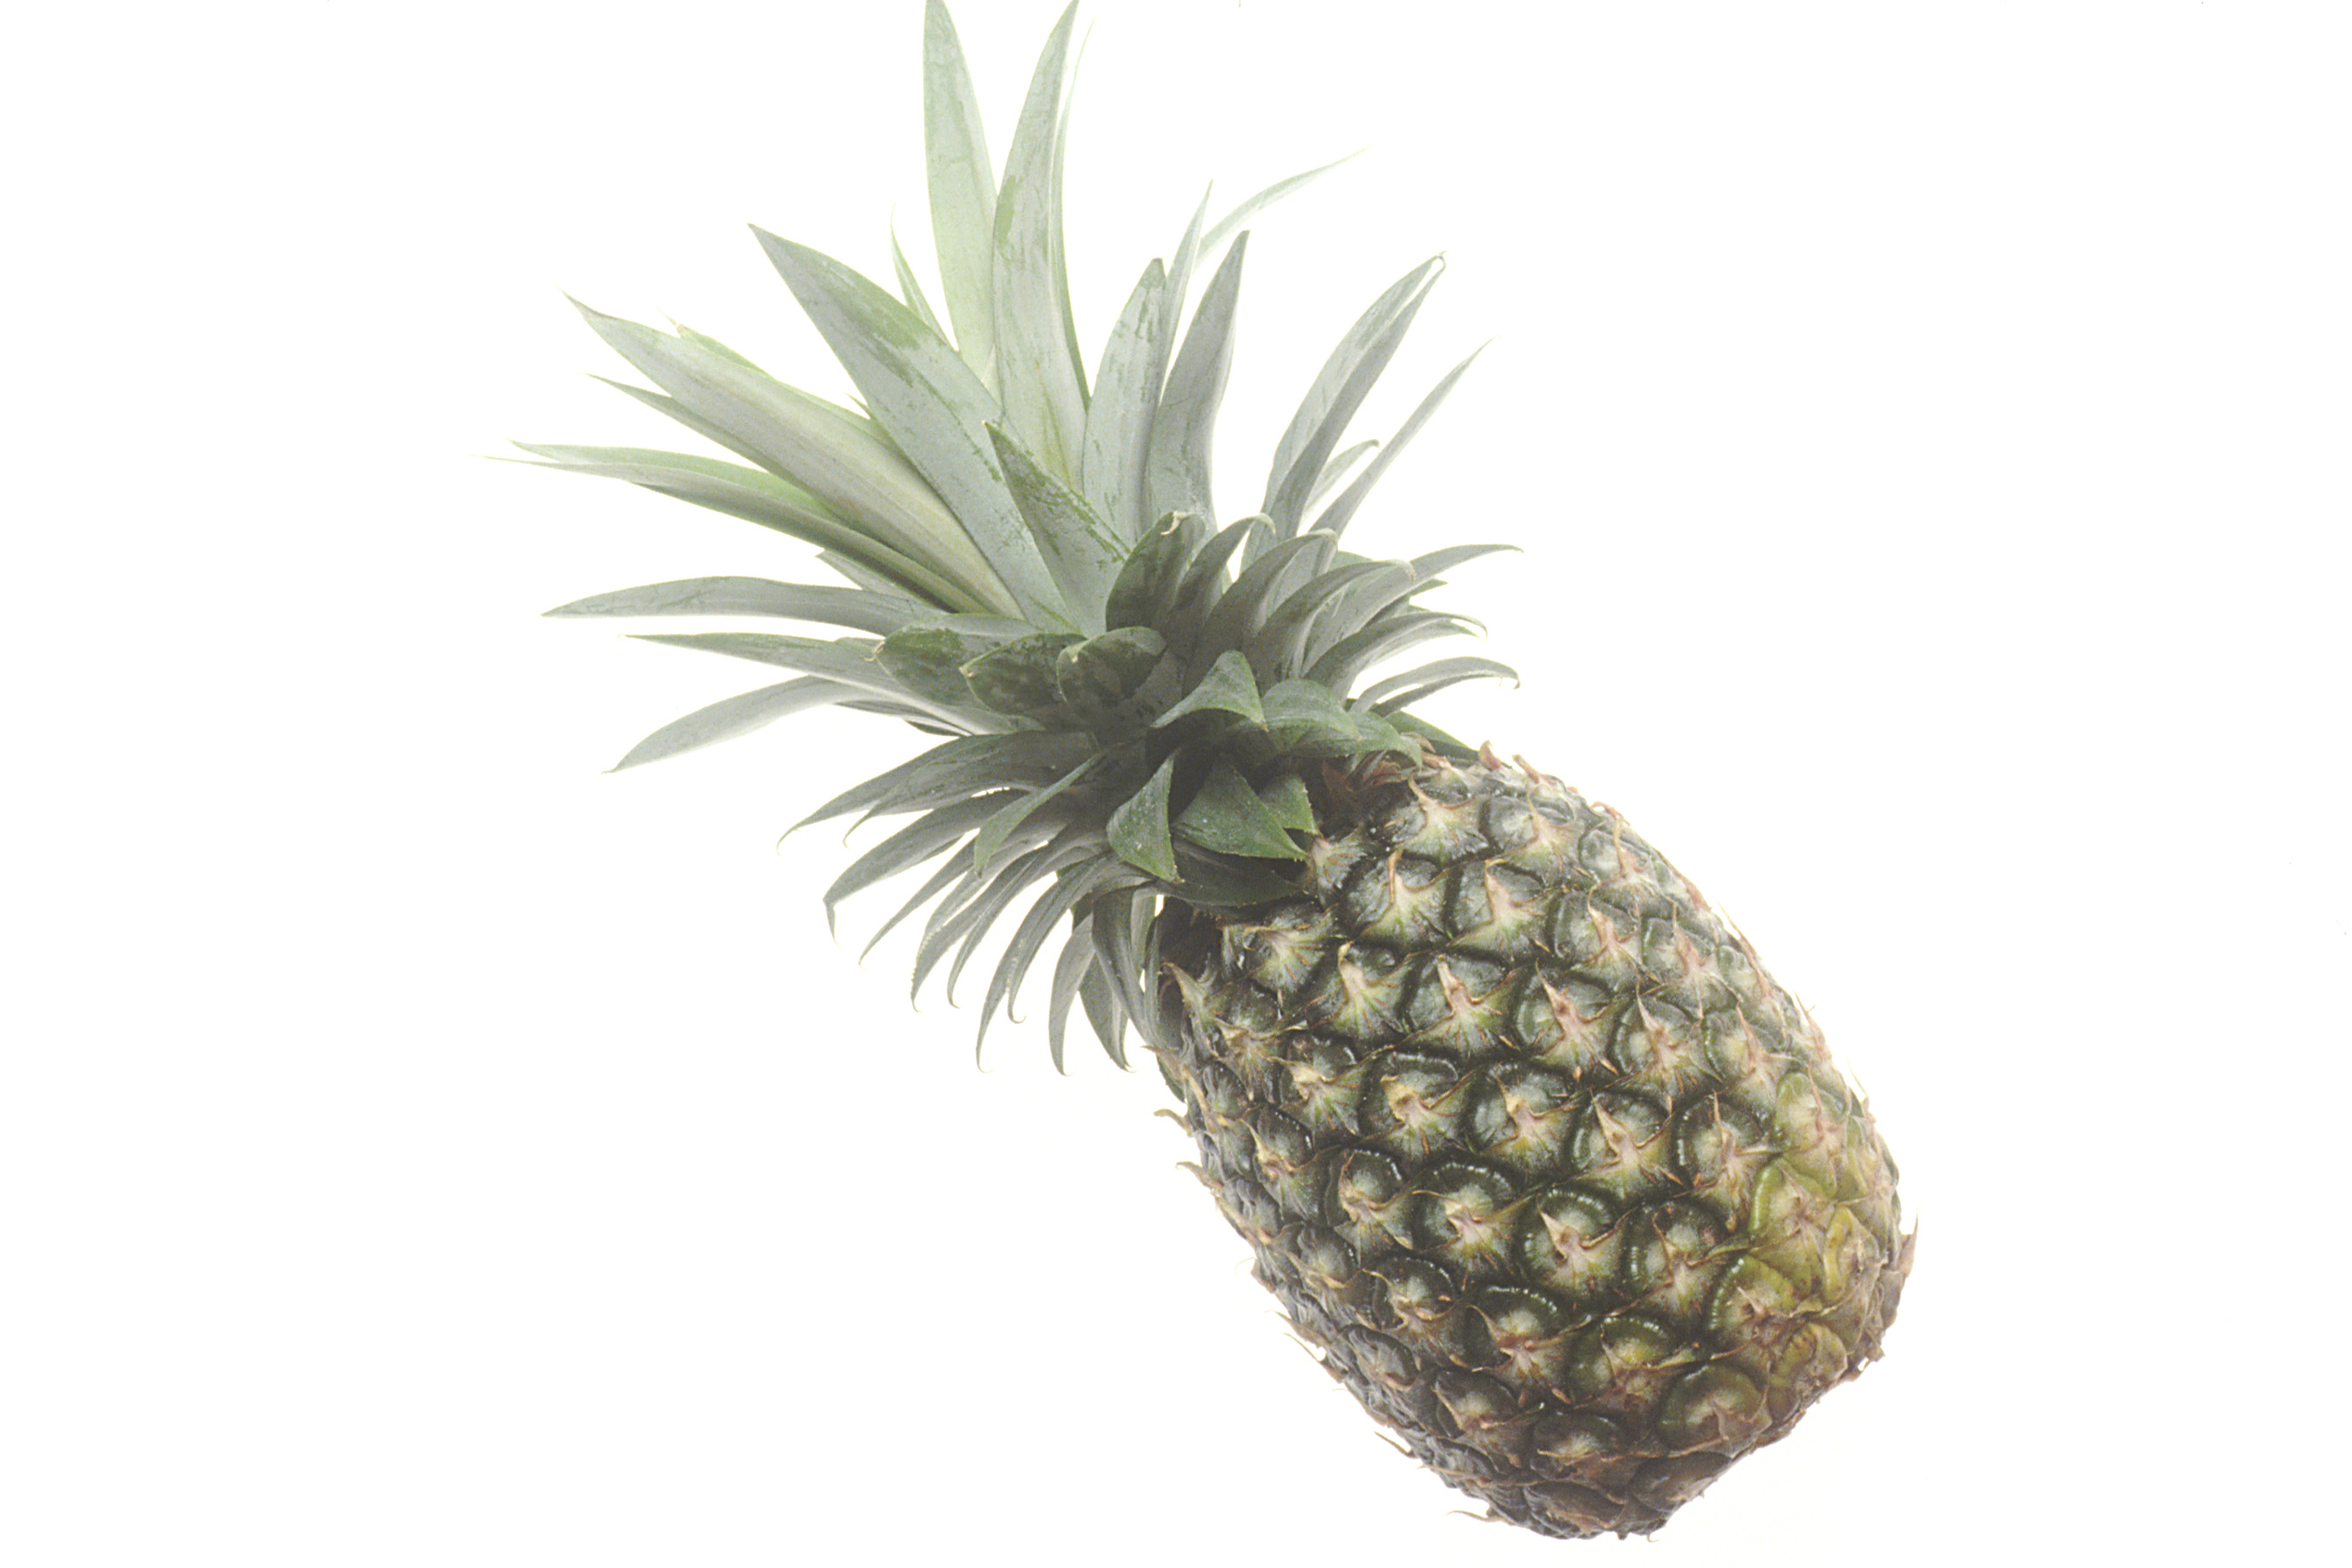

In [ ]:
Image(filename='/content/gdrive/MyDrive/Pineapple.jpg', width=300,height=200)

In [ ]:
preprocessed_image = prepare_image('Pineapple.jpg')
predictions = model.predict(preprocessed_image)

1/1 [==============================] - 7s 7s/step


In [ ]:
results = imagenet_utils.decode_predictions(predictions)
results

35363/35363 [==============================] - 0s 0us/step


[[('n07753275', 'pineapple', 0.96410507),
  ('n07730033', 'cardoon', 0.009518529),
  ('n03991062', 'pot', 0.0051792525),
  ('n02319095', 'sea_urchin', 0.0036137358),
  ('n11939491', 'daisy', 0.0033073134)]]

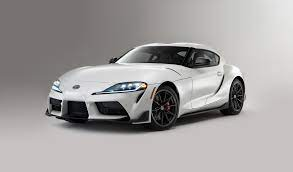

In [ ]:
Image(filename='/content/gdrive/MyDrive/Supra.jpg', width=300,height=200)

In [ ]:
preprocessed_image = prepare_image('Supra.jpg')
predictions = model.predict(preprocessed_image)

1/1 [==============================] - 0s 19ms/step


In [ ]:
results = imagenet_utils.decode_predictions(predictions)
results

[[('n04285008', 'sports_car', 0.8440665),
  ('n04037443', 'racer', 0.14467153),
  ('n03100240', 'convertible', 0.008576873),
  ('n02974003', 'car_wheel', 0.0016329706),
  ('n03670208', 'limousine', 0.00025143617)]]

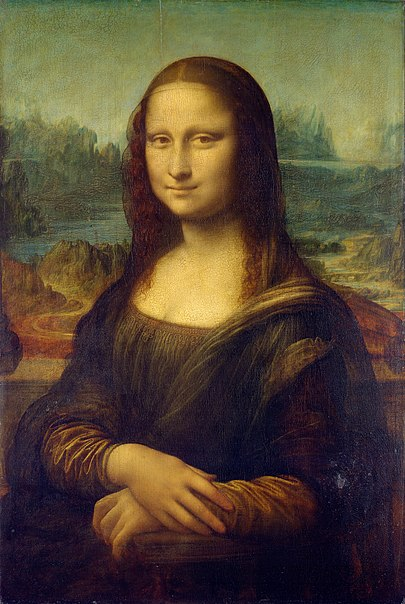

In [ ]:
Image(filename='/content/gdrive/MyDrive/Mona Lisa.jpg', width=300,height=200)

In [ ]:
preprocessed_image = prepare_image('Mona Lisa.jpg')
predictions = model.predict(preprocessed_image)

1/1 [==============================] - 0s 19ms/step


In [ ]:
results = imagenet_utils.decode_predictions(predictions)
results

[[('n03788365', 'mosquito_net', 0.12225498),
  ('n03710721', 'maillot', 0.095573075),
  ('n04493381', 'tub', 0.08743138),
  ('n04525038', 'velvet', 0.06732799),
  ('n02808440', 'bathtub', 0.055886246)]]

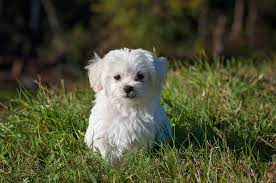

In [ ]:
Image(filename='/content/gdrive/MyDrive/dog.jpg', width=300,height=200)

In [ ]:
preprocessed_image = prepare_image('dog.jpg')
predictions = model.predict(preprocessed_image)

1/1 [==============================] - 0s 95ms/step


In [ ]:
results = imagenet_utils.decode_predictions(predictions)
results

[[('n02085936', 'Maltese_dog', 0.90524477),
  ('n02095889', 'Sealyham_terrier', 0.036052458),
  ('n02096437', 'Dandie_Dinmont', 0.023136545),
  ('n02098286', 'West_Highland_white_terrier', 0.007798996),
  ('n02098413', 'Lhasa', 0.0077807717)]]

**TPU **

In [ ]:
import tensorflow as tf
import os
import numpy as np
import tensorflow_datasets as tfds

In [ ]:
assert 'COLAB_TPU_ADDR' in os.environ, 'Missing TPU; did you request a TPU in Notebook Settings?'

if 'COLAB_TPU_ADDR' in os.environ:
  TF_MASTER = 'grpc://{}'.format(os.environ['COLAB_TPU_ADDR'])
else:
  TF_MASTER=''

tpu_address = TF_MASTER

In [ ]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu_address)
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))
print("Number of devices: ", len(tf.config.list_logical_devices('TPU')))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]
Number of devices:  8


In [ ]:
strategy = tf.distribute.TPUStrategy(resolver)

In [ ]:
def create_model():
  return tf.keras.Sequential(
      [tf.keras.layers.Conv2D(256, (3,3), activation='relu', input_shape=(28, 28, 1)),
       tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(256, activation='relu'),
       tf.keras.layers.Dense(128, activation='relu'),
       tf.keras.layers.Dense(10)
       ])

In [ ]:
def create_model():
  return tf.keras.Sequential(
      [tf.keras.layers.Conv2D(32, (5,5), activation='relu', padding='same', input_shape=(28, 28, 1)),
       tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'),
       tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
       tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(1024, activation='relu'),
       tf.keras.layers.Dropout(0.4),
       tf.keras.layers.Dense(10)
       ])

**Load in the MNIST Dataset**

In [ ]:
def get_dataset(batch_size, is_training=True):
  split = 'train' if is_training else 'test'
  dataset, info = tfds.load(name='mnist', split=split, with_info=True,
                            as_supervised=True, try_gcs=True)

  def scale(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255.0

    return image, label

  dataset = dataset.map(scale)

  # Only shuffle and repeat the dataset in training. The advantage to have a
  # infinite dataset for training is to avoid the potential last partial batch
  # in each epoch, so users don't need to think about scaling the gradients
  # based on the actual batch size.
  if is_training:
    dataset = dataset.shuffle(10000)
    dataset = dataset.repeat()

  dataset = dataset.batch(batch_size)

  return dataset

**bold tCompile the modelxt**

In [ ]:
with strategy.scope():
  model = create_model()
  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['sparse_categorical_accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 1024)              1

In [ ]:
batch_size = 200

train_dataset = get_dataset(batch_size, is_training=True)
test_dataset = get_dataset(batch_size, is_training=False)

In [ ]:
epochs = 10
steps_per_epoch = 60000 // batch_size
validation_steps = 10000 // batch_size

history = model.fit(train_dataset,
                    epochs=epochs,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=test_dataset,
                    validation_steps=validation_steps)

Epoch 1/10
300/300 [==============================] - 13s 28ms/step - loss: 0.1953 - sparse_categorical_accuracy: 0.9401 - val_loss: 0.0486 - val_sparse_categorical_accuracy: 0.9846
Epoch 2/10
300/300 [==============================] - 6s 21ms/step - loss: 0.0522 - sparse_categorical_accuracy: 0.9837 - val_loss: 0.0302 - val_sparse_categorical_accuracy: 0.9897
Epoch 3/10
300/300 [==============================] - 7s 22ms/step - loss: 0.0369 - sparse_categorical_accuracy: 0.9884 - val_loss: 0.0314 - val_sparse_categorical_accuracy: 0.9889
Epoch 4/10
300/300 [==============================] - 6s 20ms/step - loss: 0.0279 - sparse_categorical_accuracy: 0.9912 - val_loss: 0.0260 - val_sparse_categorical_accuracy: 0.9906
Epoch 5/10
300/300 [==============================] - 7s 22ms/step - loss: 0.0233 - sparse_categorical_accuracy: 0.9928 - val_loss: 0.0216 - val_sparse_categorical_accuracy: 0.9933
Epoch 6/10
300/300 [==============================] - 6s 20ms/step - loss: 0.0192 - sparse_cat

In [ ]:
with strategy.scope():
  model = create_model()
  model.compile(optimizer='adam',
                # Anything between 2 and `steps_per_epoch` could help here.
                steps_per_execution = 50,
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['sparse_categorical_accuracy'])

epochs = 5
steps_per_epoch = 60000 // batch_size
validation_steps = 10000 // batch_size

history = model.fit(train_dataset,
                epochs=5,
                steps_per_epoch=steps_per_epoch,
                validation_data=test_dataset,
                validation_steps=validation_steps)

Epoch 1/5
300/300 [==============================] - 12s 38ms/step - loss: 0.1993 - sparse_categorical_accuracy: 0.9374 - val_loss: 0.0496 - val_sparse_categorical_accuracy: 0.9833
Epoch 2/5
300/300 [==============================] - 3s 9ms/step - loss: 0.0510 - sparse_categorical_accuracy: 0.9841 - val_loss: 0.0340 - val_sparse_categorical_accuracy: 0.9890
Epoch 3/5
300/300 [==============================] - 4s 12ms/step - loss: 0.0365 - sparse_categorical_accuracy: 0.9886 - val_loss: 0.0281 - val_sparse_categorical_accuracy: 0.9897
Epoch 4/5
300/300 [==============================] - 3s 9ms/step - loss: 0.0293 - sparse_categorical_accuracy: 0.9908 - val_loss: 0.0244 - val_sparse_categorical_accuracy: 0.9919
Epoch 5/5
300/300 [==============================] - 3s 9ms/step - loss: 0.0219 - sparse_categorical_accuracy: 0.9927 - val_loss: 0.0230 - val_sparse_categorical_accuracy: 0.9919


In [ ]:
import matplotlib.pyplot as plt

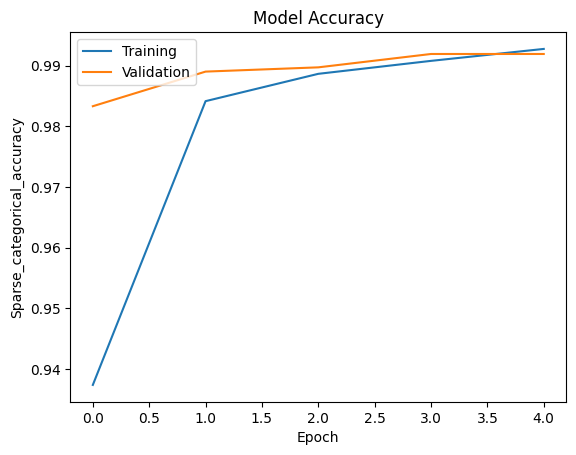

In [ ]:
# Plot the accuracy of the model during training
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Sparse_categorical_accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

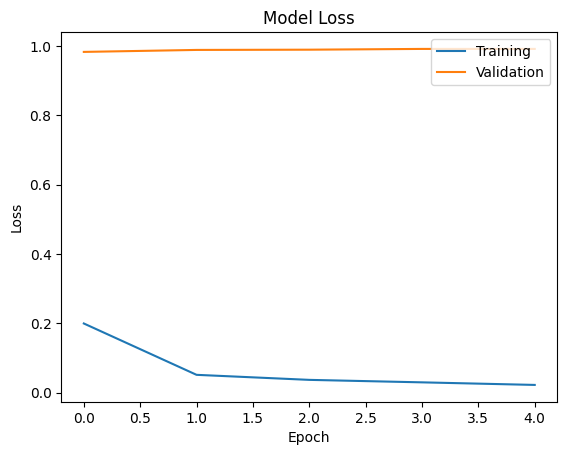

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
his = model.evaluate(test_dataset)
print(his)

50/50 [==============================] - 1s 29ms/step - loss: 0.0233 - sparse_categorical_accuracy: 0.9921
[0.023283299058675766, 0.9921000003814697]


**Image Processing for Neural Networks**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from IPython.display import Image
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)


Mounted at /content/gdrive


Processing with Image generator

In [ ]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center = False, samplewise_center = False,
    featurewise_std_normalization=False, samplewise_std_normalization=False,
    rotation_range=None, width_shift_range=0.0, height_shift_range=0.0,
    brightness_range=None, shear_range =0.0, zoom_range=0.0, channel_shift_range=0.0,
    horizontal_flip=False, vertical_flip=False, rescale = 1./255
)

In [ ]:
image = image_generator.flow_from_directory('/content/gdrive/MyDrive/', batch_size=1)

Found 42 images belonging to 3 classes.


In [ ]:
print(image)

In [ ]:
img_path = '/content/gdrive/MyDrive/LeafBrick.jpg'

img = image.load_img(img_path, target_size = (135, 640))
plt.imshow(img)
plt.axis('off')

AttributeError: ignored

CONVOLUTION NEURAL NETWORK

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
from tensorflow.python.keras.utils.data_utils import Sequence
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


IMPORT MNIST DATA SET

KERAS AUTO TUNER FOR HYPERPERAMETERS

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install -q -U keras-tuner
import kerastuner as kt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.4 MB/s eta 0:00:00


<ipython-input-4-5d7b6944a6ac>:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


Load the fashion MNIST dataset

In [ ]:
(img_train, label_train), (img_test, label_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Show samples from the dataset

In [ ]:
def plotImages(images_arr, rows, cols):
    fig, axes = plt.subplots(10, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

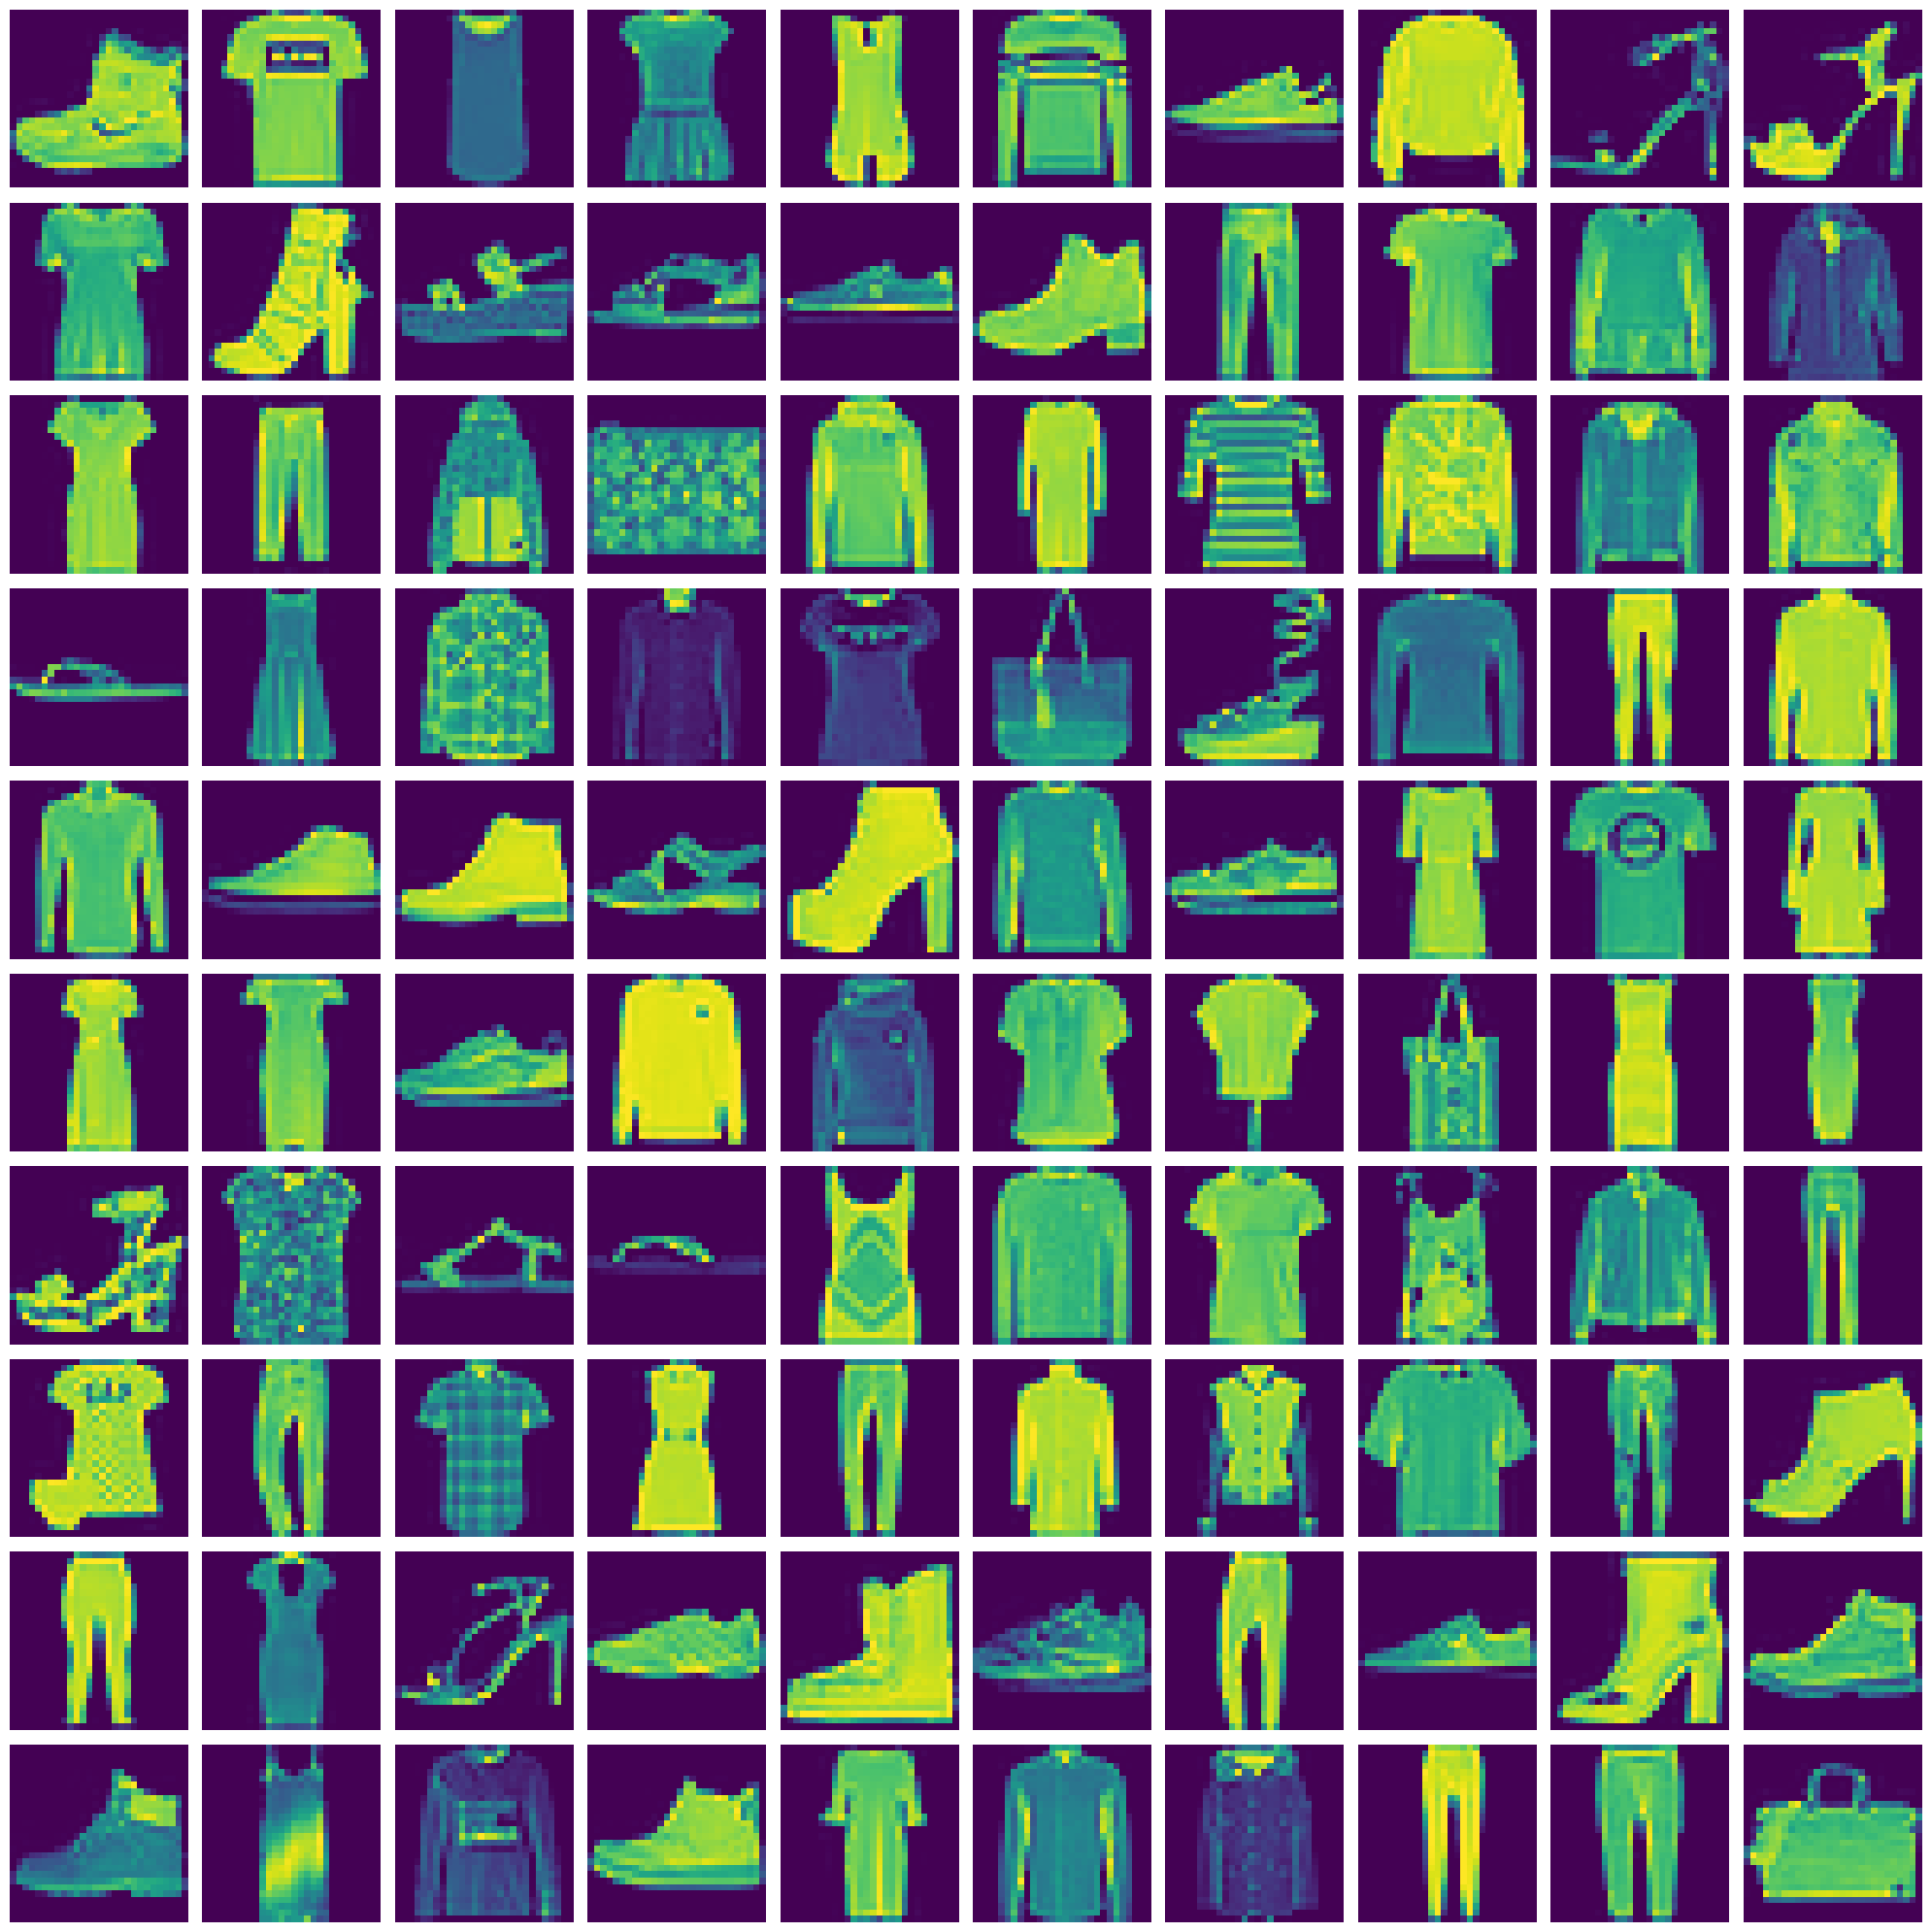

In [ ]:
plotImages(img_train[:100], 10, 10)

BUILD THE MODEL

In [ ]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))

  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(100))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

INSTANTIATE THE TUNER AND PERFORM HYPER TUNING

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

In [ ]:
tuner.search(img_train, label_train, epochs=20, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 00m 49s]
val_accuracy: 0.8432499766349792

Best val_accuracy So Far: 0.8522499799728394
Total elapsed time: 00h 11m 53s

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 416 and the optimal learning rate for the optimizer
is 0.0001.



TRAIN THE MODEL

In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 30 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(img_train, label_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 5s 3ms/step - loss: 9.1853 - accuracy: 0.7558 - val_loss: 6.1511 - val_accuracy: 0.7784
Epoch 2/30
1500/1500 [==============================] - 4s 3ms/step - loss: 4.2931 - accuracy: 0.8116 - val_loss: 3.7186 - val_accuracy: 0.8177
Epoch 3/30
1500/1500 [==============================] - 5s 3ms/step - loss: 3.0959 - accuracy: 0.8267 - val_loss: 3.0556 - val_accuracy: 0.8372
Epoch 4/30
1500/1500 [==============================] - 4s 3ms/step - loss: 2.4490 - accuracy: 0.8379 - val_loss: 2.7817 - val_accuracy: 0.8242
Epoch 5/30
1500/1500 [==============================] - 4s 3ms/step - loss: 1.9706 - accuracy: 0.8491 - val_loss: 3.2464 - val_accuracy: 0.7818
Epoch 6/30
1500/1500 [==============================] - 5s 3ms/step - loss: 1.7124 - accuracy: 0.8537 - val_loss: 2.2185 - val_accuracy: 0.8320
Epoch 7/30
1500/1500 [==============================] - 4s 3ms/step - loss: 1.4373 - accuracy: 0.8629 - val_loss: 2.2679 - val_accuracy:

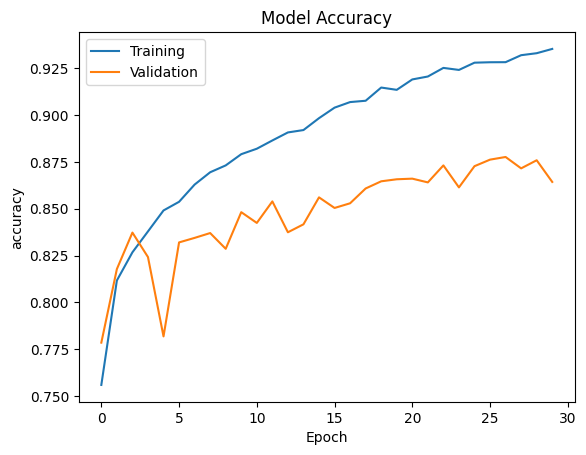

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

Evaluate the trained model

In [ ]:
evaluation = model.evaluate(img_test, label_test)
print("[test loss, test accuracy]:", evaluation)

313/313 [==============================] - 1s 2ms/step - loss: 0.7617 - accuracy: 0.8606
[test loss, test accuracy]: [0.7617313265800476, 0.8605999946594238]


Predictions

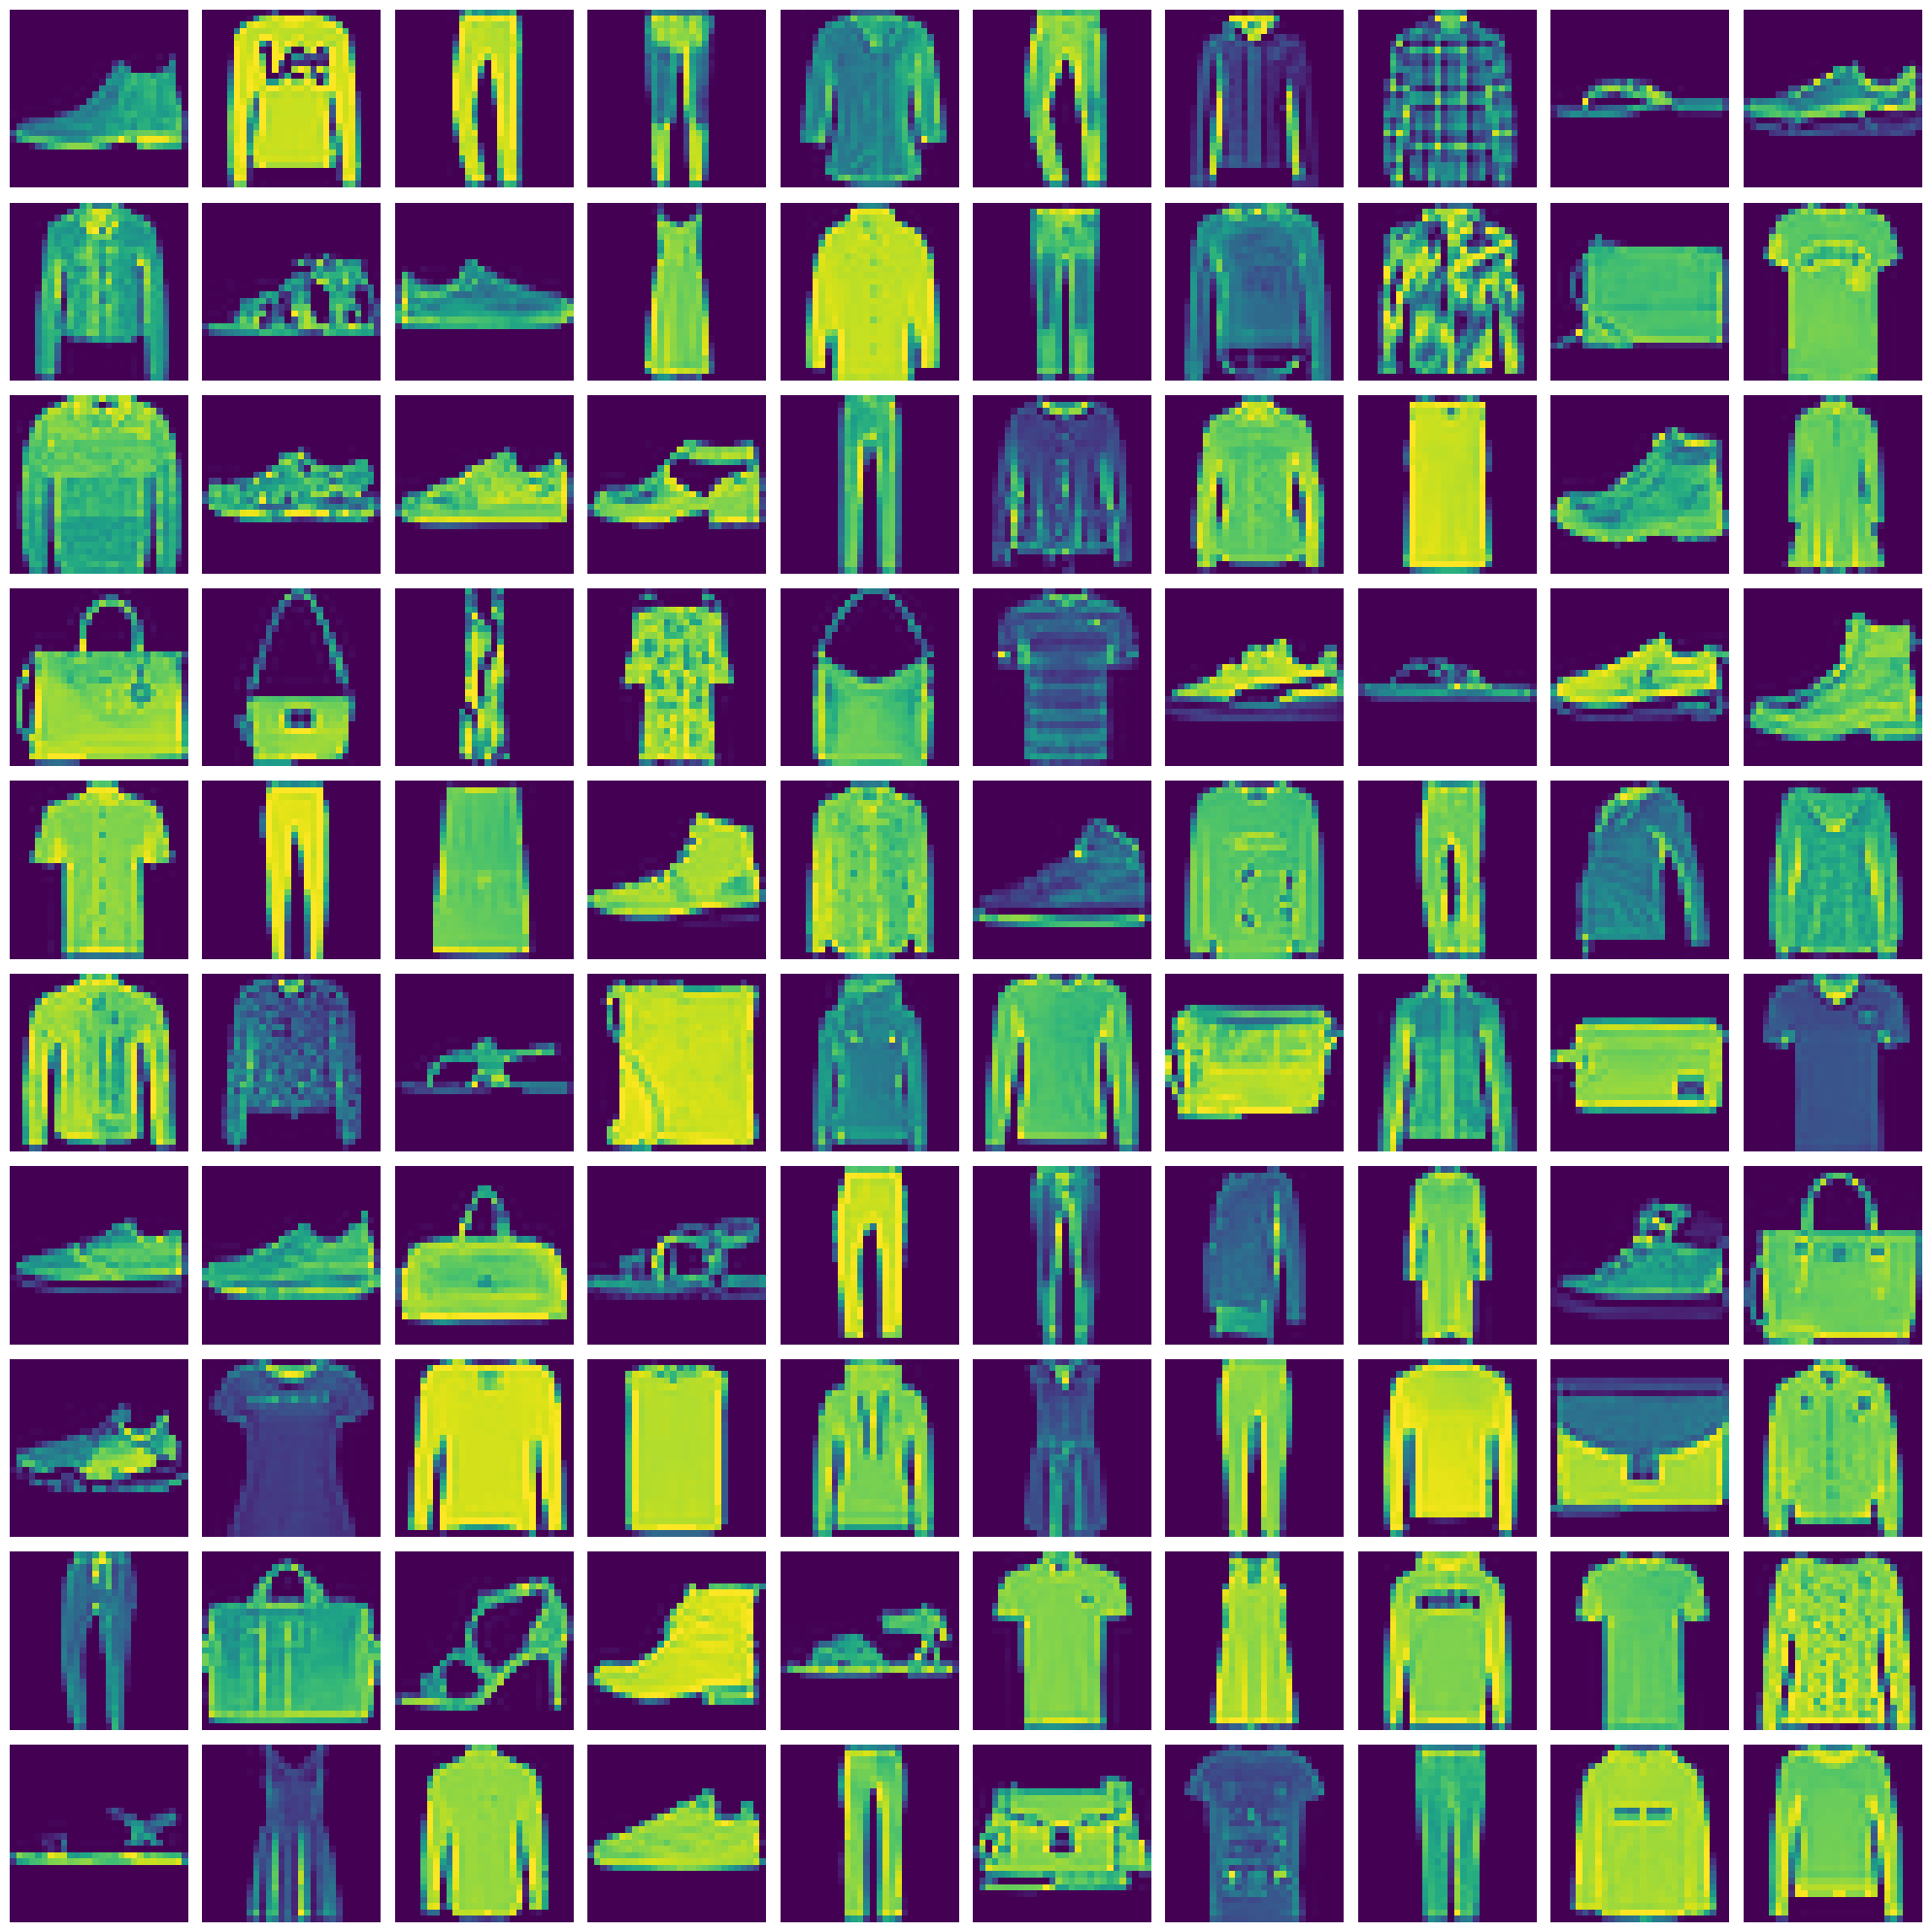

In [ ]:
plotImages(img_test[:100],10,10)

In [ ]:
predictions = np.argmax(model.predict(img_test[:100]), axis=-1)
print(predictions)

4/4 [==============================] - 0s 2ms/step
[9 2 1 1 0 1 4 6 5 7 4 5 5 3 4 1 2 4 8 0 2 5 7 5 1 2 6 0 9 4 8 8 3 3 8 0 7
 5 7 9 6 1 6 9 6 7 2 1 2 6 4 2 5 8 2 2 8 6 8 0 7 7 8 5 1 1 0 4 7 8 7 0 0 6
 2 3 1 2 8 4 1 8 5 9 5 0 1 2 0 6 5 3 6 7 1 8 0 1 4 2]


Reading captchs with OCR model

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from collections import Counter
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
!curl -LO https://github.com/AakashKumarNain/CaptchaCracker/raw/master/captcha_images_v2.zip
!unzip -qq captcha_images_v2.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 8863k  100 8863k    0     0  12.6M      0 --:--:-- --:--:-- --:--:-- 12.6M


In [ ]:
# Path to the data directory
data_dir = Path("./captcha_images_v2/")

# Get list of all the images
images = sorted(list(map(str, list(data_dir.glob("*.png")))))
labels = [img.split(os.path.sep)[-1].split(".png")[0] for img in images]
characters = set(char for label in labels for char in label)

print("Number of images found: ", len(images))
print("Number of labels found: ", len(labels))
print("Number of unique characters: ", len(characters))
print("Characters present: ", characters)

# Batch size for training and validation
batch_size = 16

# Desired image dimensions
img_width = 200
img_height = 50

# Factor by which the image is going to be downsampled
# by the convolutional blocks. We will be using two
# convolution blocks and each block will have
# a pooling layer which downsample the features by a factor of 2.
# Hence total downsampling factor would be 4.
downsample_factor = 4

# Maximum length of any captcha in the dataset
max_length = max([len(label) for label in labels])

Number of images found:  1040
Number of labels found:  1040
Number of unique characters:  19
Characters present:  {'6', 'g', 'b', '4', 'n', '2', 'p', 'w', '7', 'c', 'd', 'y', '5', 'm', 'e', 'f', 'x', '8', '3'}


In [ ]:
# Mapping characters to integers
char_to_num = layers.experimental.preprocessing.StringLookup(
    vocabulary=list(characters), num_oov_indices=0, mask_token=None
)

# Mapping integers back to original characters
num_to_char = layers.experimental.preprocessing.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)


def split_data(images, labels, train_size=0.9, shuffle=True):
    # 1. Get the total size of the dataset
    size = len(images)
    # 2. Make an indices array and shuffle it, if required
    indices = np.arange(size)
    if shuffle:
        np.random.shuffle(indices)
    # 3. Get the size of training samples
    train_samples = int(size * train_size)
    # 4. Split data into training and validation sets
    x_train, y_train = images[indices[:train_samples]], labels[indices[:train_samples]]
    x_valid, y_valid = images[indices[train_samples:]], labels[indices[train_samples:]]
    return x_train, x_valid, y_train, y_valid


# Splitting data into training and validation sets
x_train, x_valid, y_train, y_valid = split_data(np.array(images), np.array(labels))


def encode_single_sample(img_path, label):
    # 1. Read image
    img = tf.io.read_file(img_path)
    # 2. Decode and convert to grayscale
    img = tf.io.decode_png(img, channels=1)
    # 3. Convert to float32 in [0, 1] range
    img = tf.image.convert_image_dtype(img, tf.float32)
    # 4. Resize to the desired size
    img = tf.image.resize(img, [img_height, img_width])
    # 5. Transpose the image because we want the time
    # dimension to correspond to the width of the image.
    img = tf.transpose(img, perm=[1, 0, 2])
    # 6. Map the characters in label to numbers
    label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))
    # 7. Return a dict as our model is expecting two inputs
    return {"image": img, "label": label}

/usr/local/lib/python3.9/dist-packages/numpy/core/numeric.py:2449: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (
    train_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
)

validation_dataset = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))
validation_dataset = (
    validation_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
)

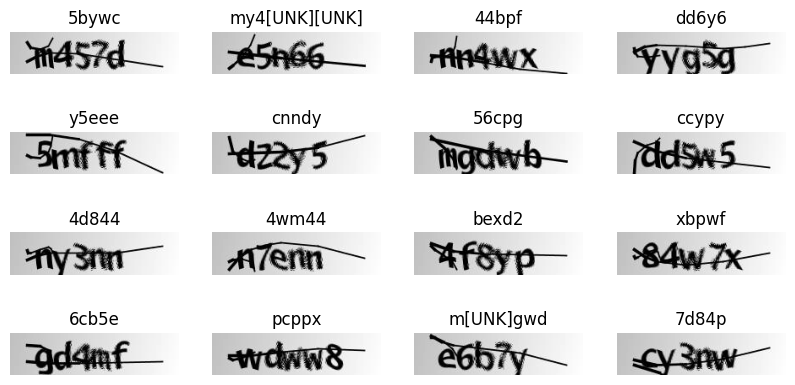

In [ ]:
_, ax = plt.subplots(4, 4, figsize=(10, 5))
for batch in train_dataset.take(1):
    images = batch["image"]
    labels = batch["label"]
    for i in range(16):
        img = (images[i] * 255).numpy().astype("uint8")
        label = tf.strings.reduce_join(num_to_char(labels[i])).numpy().decode("utf-8")
        ax[i // 4, i % 4].imshow(img[:, :, 0].T, cmap="gray")
        ax[i // 4, i % 4].set_title(label)
        ax[i // 4, i % 4].axis("off")
plt.show()

In [ ]:
class CTCLayer(layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        # Compute the training-time loss value and add it
        # to the layer using `self.add_loss()`.
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # At test time, just return the computed predictions
        return y_pred


def build_model():
    # Inputs to the model
    input_img = layers.Input(
        shape=(img_width, img_height, 1), name="image", dtype="float32"
    )
    labels = layers.Input(name="label", shape=(None,), dtype="float32")

    # First conv block
    x = layers.Conv2D(
        32,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv1",
    )(input_img)
    x = layers.MaxPooling2D((2, 2), name="pool1")(x)

    # Second conv block
    x = layers.Conv2D(
        64,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv2",
    )(x)
    x = layers.MaxPooling2D((2, 2), name="pool2")(x)

    # We have used two max pool with pool size and strides 2.
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before
    # passing the output to the RNN part of the model
    new_shape = ((img_width // 4), (img_height // 4) * 64)
    x = layers.Reshape(target_shape=new_shape, name="reshape")(x)
    x = layers.Dense(64, activation="relu", name="dense1")(x)
    x = layers.Dropout(0.2)(x)

    # RNNs
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(x)
    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.25))(x)

    # Output layer
    x = layers.Dense(len(characters) + 1, activation="softmax", name="dense2")(x)

    # Add CTC layer for calculating CTC loss at each step
    output = CTCLayer(name="ctc_loss")(labels, x)

    # Define the model
    model = keras.models.Model(
        inputs=[input_img, labels], outputs=output, name="ocr_model_v1"
    )
    # Optimizer
    opt = keras.optimizers.Adam()
    # Compile the model and return
    model.compile(optimizer=opt)
    return model


# Get the model
model = build_model()
model.summary()

Model: "ocr_model_v1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 200, 50, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 Conv1 (Conv2D)                 (None, 200, 50, 32)  320         ['image[0][0]']                  
                                                                                                  
 pool1 (MaxPooling2D)           (None, 100, 25, 32)  0           ['Conv1[0][0]']                  
                                                                                                  
 Conv2 (Conv2D)                 (None, 100, 25, 64)  18496       ['pool1[0][0]']       

In [ ]:
epochs = 100
early_stopping_patience = 10
# Add early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=early_stopping_patience, restore_best_weights=True
)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=epochs,
    callbacks=[early_stopping],
)

Epoch 1/100
59/59 [==============================] - 22s 61ms/step - loss: 21.3594 - val_loss: 16.4078
Epoch 2/100
59/59 [==============================] - 2s 32ms/step - loss: 16.3407 - val_loss: 16.4137
Epoch 3/100
59/59 [==============================] - 2s 31ms/step - loss: 16.3358 - val_loss: 16.4172
Epoch 4/100
59/59 [==============================] - 2s 32ms/step - loss: 16.3337 - val_loss: 16.4086
Epoch 5/100
59/59 [==============================] - 2s 36ms/step - loss: 16.3264 - val_loss: 16.4142
Epoch 6/100
59/59 [==============================] - 3s 45ms/step - loss: 16.3214 - val_loss: 16.4225
Epoch 7/100
59/59 [==============================] - 2s 31ms/step - loss: 16.3143 - val_loss: 16.4176
Epoch 8/100
59/59 [==============================] - 2s 31ms/step - loss: 16.3102 - val_loss: 16.4151
Epoch 9/100
59/59 [==============================] - 2s 32ms/step - loss: 16.2939 - val_loss: 16.3792
Epoch 10/100
59/59 [==============================] - 2s 33ms/step - loss: 16.273

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 200, 50, 1)]      0         
                                                                 
 Conv1 (Conv2D)              (None, 200, 50, 32)       320       
                                                                 
 pool1 (MaxPooling2D)        (None, 100, 25, 32)       0         
                                                                 
 Conv2 (Conv2D)              (None, 100, 25, 64)       18496     
                                                                 
 pool2 (MaxPooling2D)        (None, 50, 12, 64)        0         
                                                                 
 reshape (Reshape)           (None, 50, 768)           0         
                                                                 
 dense1 (Dense)              (None, 50, 64)            49216 

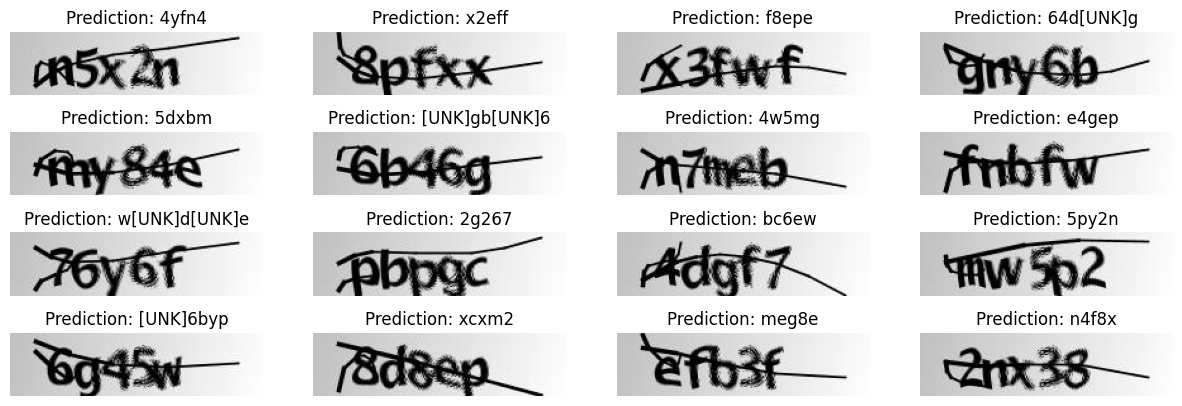

In [ ]:
prediction_model = keras.models.Model(
    model.get_layer(name="image").input, model.get_layer(name="dense2").output
)
prediction_model.summary()

# A utility function to decode the output of the network
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
        :, :max_length
    ]
    # Iterate over the results and get back the text
    output_text = []
    for res in results:
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text


#  Let's check results on some validation samples
for batch in validation_dataset.take(1):
    batch_images = batch["image"]
    batch_labels = batch["label"]

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)

    orig_texts = []
    for label in batch_labels:
        label = tf.strings.reduce_join(num_to_char(label)).numpy().decode("utf-8")
        orig_texts.append(label)

    _, ax = plt.subplots(4, 4, figsize=(15, 5))
    for i in range(len(pred_texts)):
        img = (batch_images[i, :, :, 0] * 255).numpy().astype(np.uint8)
        img = img.T
        title = f"Prediction: {pred_texts[i]}"
        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(title)
        ax[i // 4, i % 4].axis("off")
plt.show()

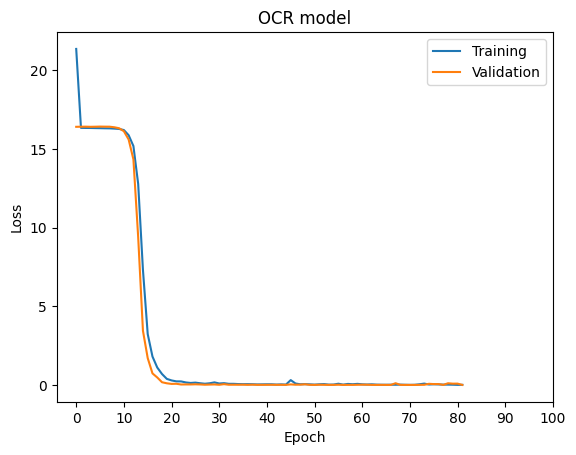

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xticks(range(0, epochs + 1, 10))
plt.title("OCR model")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Training','Validation'], loc="upper right")
plt.show()